In [1]:
"""
Part 3 - Solution
"""

# importing os library 
import os

# importing sqllite version 3 as embedded databse in python
import sqlite3

# importing pandas
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt

# creating database named Database_covid
conn = sqlite3.connect ( 'Database_covid5.db' )

# creating cursor for database
c = conn.cursor()

# 1.	Load some initial data (as discussed above) into the database tables that you created in Part 2 of the assignment. You can either write a loading program, or use SQL/PLUS (insert command), or use SQL/FORMS. Your data should be kept in files so that it can easily be reloaded during debugging. The data format should be designed by you. (Note: You can also use the transactions created by you in item 3 below to load some of the data).

In [2]:
# setting lists for column names
overall_administered_dose_columns = ['FIPS', 'DATE', 'STATE', 'ADMINISTERED_DOSE_FULL', 'ADMINISTERED_FIRST', 'BOOSTER_DOSE']
state_administered_dose_columns = ['FIPS', 'STATE_FULLY', 'STATE_FIRST', 'STATE_BOOSTER']
independent_administered_dose_columns = ['FIPS', 'INDEPENDENT_FULLY', 'INDEPENDENT_FIRST', 'INDEPENDENT_BOOSTER']
local_administered_dose_columns = ['FIPS', 'LOCAL_FULLY', 'LOCAL_FIRST', 'LOCAL_BOOSTER']
people_columns = ['FIPS', 'SSN', 'FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'TELEPHONE',  'EMAIL', 'AGE', 'MEDICAL_CONDITION', 'ALLERGY', 'DOSE']
vaccination_phase_columns = ['SSN', 'VACCINATION_PHASE']
manufacturer_columns = ['MANUFACTURER_ID', 'NAME', 'Vaccine Type']
dose_manufacturer_columns = ['MANUFACTURER_ID', 'DOSES']
distribution_state_columns = ['STATE', 'DOSES_STATE', 'DOSES_STATE_TYPE1', 'DOSES_STATE_TYPE2', 'DOSES_STATE_TYPE3']
distribution_independent_columns = ['STATE', 'DOSES_INDEPENDENT', 'DOSES_INDEPENDENT_TYPE1', 'DOSES_INDEPENDENT_TYPE2', 'DOSES_INDEPENDENT_TYPE3']
distribution_local_columns = ['STATE', 'DOSES_LOCAL', 'DOSES_LOCAL_TYPE1', 'DOSES_LOCAL_TYPE2', 'DOSES_LOCAL_TYPE3']

In [3]:
""" MANUFACTURER """

# Creating tables MANUFACTURER
c.execute('Create table MANUFACTURER( MANUFACTURER_ID int primary key, NAME varchar (20), Vaccine_Type varchar (50));')

# inserting data into MANUFACTURER
c.execute("INSERT INTO MANUFACTURER VALUES (1,'Pfizer/BioNTech','Nucleic acid or mRNA');")
c.execute("INSERT INTO MANUFACTURER VALUES (2,'Moderna','Nucleic acid or mRNA');")
c.execute("INSERT INTO MANUFACTURER VALUES (3,'Oxford/AstraZeneca','Viral Vector');")
c.execute("INSERT INTO MANUFACTURER VALUES (4,'Johnson&Johnson','Viral Vector');")
c.execute("INSERT INTO MANUFACTURER VALUES (5,'Sputnik V','Viral Vector');")
c.execute("INSERT INTO MANUFACTURER VALUES (6,'Sinovac/CoronaVac','Whole virus');")
c.execute("INSERT INTO MANUFACTURER VALUES (7,'Sinopharm/Beijing','Whole virus');")
c.execute("INSERT INTO MANUFACTURER VALUES (8,'Novavax','Protein Subunit');")
c.execute("INSERT INTO MANUFACTURER VALUES (9,'Covaxin','Whole virus');")

# fetching MANUFACTURER into python dataframe - just to check
c.execute("SELECT * FROM MANUFACTURER;")
data_MANUFACTURER = pd.DataFrame(c.fetchall(),columns=manufacturer_columns)
print(data_MANUFACTURER)

   MANUFACTURER_ID                NAME          Vaccine Type
0                1     Pfizer/BioNTech  Nucleic acid or mRNA
1                2             Moderna  Nucleic acid or mRNA
2                3  Oxford/AstraZeneca          Viral Vector
3                4     Johnson&Johnson          Viral Vector
4                5           Sputnik V          Viral Vector
5                6   Sinovac/CoronaVac           Whole virus
6                7   Sinopharm/Beijing           Whole virus
7                8             Novavax       Protein Subunit
8                9             Covaxin           Whole virus


In [4]:
"""
DOSE_MANUFACTURER
"""

# Creating tables DOSE_MANUFACTURER
c.execute("Create table DOSE_MANUFACTURER( MANUFACTURER_ID int, DOSES int, Foreign Key (MANUFACTURER_ID) references MANUFACTURER (MANUFACTURER_ID));")

# inserting data into DOSE_MANUFACTURER
c.execute("INSERT INTO DOSE_MANUFACTURER VALUES (1,330);")
c.execute("INSERT INTO DOSE_MANUFACTURER VALUES (2,210);")
c.execute("INSERT INTO DOSE_MANUFACTURER VALUES (3,0);")
c.execute("INSERT INTO DOSE_MANUFACTURER VALUES (4,18);")
c.execute("INSERT INTO DOSE_MANUFACTURER VALUES (5,0);")
c.execute("INSERT INTO DOSE_MANUFACTURER VALUES (6,0);")
c.execute("INSERT INTO DOSE_MANUFACTURER VALUES (7,0);")
c.execute("INSERT INTO DOSE_MANUFACTURER VALUES (8,0);")
c.execute("INSERT INTO DOSE_MANUFACTURER VALUES (9,0);")

# fetching DOSE_MANUFACTURER into python dataframe - just to check
c.execute("SELECT * FROM DOSE_MANUFACTURER;")
data_DOSE_MANUFACTURER= pd.DataFrame(c.fetchall(),columns=dose_manufacturer_columns)
print(data_DOSE_MANUFACTURER)

   MANUFACTURER_ID  DOSES
0                1    330
1                2    210
2                3      0
3                4     18
4                5      0
5                6      0
6                7      0
7                8      0
8                9      0


In [5]:
"""
distribution_state
"""

# Creating tables distribution_state
c.execute("Create table distribution_state(STATE varchar(100) primary key, DOSES_STATE int, DOSES_STATE_TYPE1 int, DOSES_STATE_TYPE2 int, DOSES_STATE_TYPE3 int);")

# inserting data into distribution_state
c.execute("INSERT INTO distribution_state VALUES ('Alabama',4614720,2630390,1107532,876796);")
c.execute("INSERT INTO distribution_state VALUES ('Alaska',718432,409506,172423,136502);")
c.execute("INSERT INTO distribution_state VALUES ('Arizona',7009660,3995506,1682318,1331835);")
c.execute("INSERT INTO distribution_state VALUES ('Arkansas',2922960,1666087,701510,555362);")
c.execute("INSERT INTO distribution_state VALUES ('California',42839762,24418664,10281543,8139554);")
c.execute("INSERT INTO distribution_state VALUES ('Colorado',5911037,3369291,1418649,1123097);")
c.execute("INSERT INTO distribution_state VALUES ('Connecticut',4141267,2360522,993904,786840);")
c.execute("INSERT INTO distribution_state VALUES ('Delaware',1107577,631319,265818,210439);")
c.execute("INSERT INTO distribution_state VALUES ('District of Columbia',885702,504850,212568,168283);")
c.execute("INSERT INTO distribution_state VALUES ('Florida',22755372,12970562,5461289,4323520);")
c.execute("INSERT INTO distribution_state VALUES ('Georgia',10293047,5867037,2470331,1955679);")
c.execute("INSERT INTO distribution_state VALUES ('Hawaii',1656740,944341,397617,314780);")
c.execute("INSERT INTO distribution_state VALUES ('Idaho',1602445,913393,384586,304464);")
c.execute("INSERT INTO distribution_state VALUES ('Illinois',13045647,7436019,3130955,2478673);")
c.execute("INSERT INTO distribution_state VALUES ('Indiana',6286040,3583042,1508649,1194347);")
c.execute("INSERT INTO distribution_state VALUES ('Iowa',3109327,1772316,746238,590772);")
c.execute("INSERT INTO distribution_state VALUES ('Kansas',2865207,1633168,687649,544389);")
c.execute("INSERT INTO distribution_state VALUES ('Kentucky',4182087,2383789,1003701,794596);")
c.execute("INSERT INTO distribution_state VALUES ('Louisiana',3941245,2246509,945898,748836);")
c.execute("INSERT INTO distribution_state VALUES ('Maine',1592075,907482,382098,302494);")
c.execute("INSERT INTO distribution_state VALUES ('Maryland',7487205,4267706,1796929,1422568);")
c.execute("INSERT INTO distribution_state VALUES ('Massachusetts',8068345,4598956,1936402,1532985);")
c.execute("INSERT INTO distribution_state VALUES ('Michigan',9984765,5691316,2396343,1897105);")
c.execute("INSERT INTO distribution_state VALUES ('Minnesota',5974185,3405285,1433804,1135095);")
c.execute("INSERT INTO distribution_state VALUES ('Mississippi',2636467,1502786,632752,500928);")
c.execute("INSERT INTO distribution_state VALUES ('Missouri',5522202,3147655,1325328,1049218);")
c.execute("INSERT INTO distribution_state VALUES ('Montana',938347,534858,225203,178286);")
c.execute("INSERT INTO distribution_state VALUES ('Nebraska',1879755,1071460,451141,357153);")
c.execute("INSERT INTO distribution_state VALUES ('Nevada',2829005,1612532,678961,537510);")
c.execute("INSERT INTO distribution_state VALUES ('New Hampshire',1632015,930248,391683,310082);")
c.execute("INSERT INTO distribution_state VALUES ('New Jersey',10445917,5954172,2507020,1984724);")
c.execute("INSERT INTO distribution_state VALUES ('New Mexico',2119772,1208270,508745,402756);")
c.execute("INSERT INTO distribution_state VALUES ('New York',21894422,12479820,5254661,4159940);")
c.execute("INSERT INTO distribution_state VALUES ('North Carolina',10413850,5935894,2499324,1978631);")
c.execute("INSERT INTO distribution_state VALUES ('North Dakota',655800,373806,157392,124602);")
c.execute("INSERT INTO distribution_state VALUES ('Ohio',10949027,6240945,2627766,2080315);")
c.execute("INSERT INTO distribution_state VALUES ('Oklahoma',3483915,1985831,836139,661943);")
c.execute("INSERT INTO distribution_state VALUES ('Oregon',4749642,2707296,1139914,902432);")
c.execute("INSERT INTO distribution_state VALUES ('Pennsylvania',14364562,8187800,3447495,2729266);")
c.execute("INSERT INTO distribution_state VALUES ('Rhode Island',1245062,709685,298815,236561);")
c.execute("INSERT INTO distribution_state VALUES ('South Carolina',4985437,2841699,1196505,947233);")
c.execute("INSERT INTO distribution_state VALUES ('South Dakota',879782,501476,211147,167158);")
c.execute("INSERT INTO distribution_state VALUES ('Tennessee',6104365,3479488,1465047,1159829);")
c.execute("INSERT INTO distribution_state VALUES ('Texas',29326747,16716246,7038419,5572082);")
c.execute("INSERT INTO distribution_state VALUES ('Utah',2984525,1701179,716286,567059);")
c.execute("INSERT INTO distribution_state VALUES ('Vermont',847875,483288,203490,161096);")
c.execute("INSERT INTO distribution_state VALUES ('Virginia',9346402,5327449,2243136,1775816);")
c.execute("INSERT INTO distribution_state VALUES ('Washington',8402197,4789252,2016527,1596417);")
c.execute("INSERT INTO distribution_state VALUES ('West Virginia',1919842,1094310,460762,364770);")
c.execute("INSERT INTO distribution_state VALUES ('Wisconsin',5525472,3149519,1326113,1049839);")
c.execute("INSERT INTO distribution_state VALUES ('Wyoming',465792,265501,111790,88500);")
c.execute("INSERT INTO distribution_state VALUES ('American Samoa',46405,26450,11137,8816);")
c.execute("INSERT INTO distribution_state VALUES ('Federated States of Micronesia',75550,43063,18132,14354);")
c.execute("INSERT INTO distribution_state VALUES ('Guam',158580,90390,38059,30130);")
c.execute("INSERT INTO distribution_state VALUES ('Marshall Islands',40540,23107,9729,7702);")
c.execute("INSERT INTO distribution_state VALUES ('Northern Mariana Islands',60715,34607,14571,11535);")
c.execute("INSERT INTO distribution_state VALUES ('Puerto Rico',3633895,2071320,872134,690440);")
c.execute("INSERT INTO distribution_state VALUES ('Republic of Palau',21995,12537,5278,4179);")
c.execute("INSERT INTO distribution_state VALUES ('Virgin Islands',72730,41456,17455,13818);")

# fetching distribution_state into python dataframe - just to check
c.execute("SELECT * FROM distribution_state;")
data_distribution_state= pd.DataFrame(c.fetchall(),columns=distribution_state_columns)
print(data_distribution_state)

                             STATE  DOSES_STATE  DOSES_STATE_TYPE1  \
0                          Alabama      4614720            2630390   
1                           Alaska       718432             409506   
2                          Arizona      7009660            3995506   
3                         Arkansas      2922960            1666087   
4                       California     42839762           24418664   
5                         Colorado      5911037            3369291   
6                      Connecticut      4141267            2360522   
7                         Delaware      1107577             631319   
8             District of Columbia       885702             504850   
9                          Florida     22755372           12970562   
10                         Georgia     10293047            5867037   
11                          Hawaii      1656740             944341   
12                           Idaho      1602445             913393   
13                  

In [6]:
"""
distribution_independent
"""

# Creating tables distribution_independent
c.execute("Create table distribution_independent(STATE varchar(100), DOSES_INDEPENDENT int, DOSES_INDEPENDENT_TYPE1 int, DOSES_INDEPENDENT_TYPE2 int, DOSES_INDEPENDENT_TYPE3 int, Foreign Key (STATE) references distribution_state (STATE));")

# inserting data into distribution_independent
c.execute("INSERT INTO distribution_independent VALUES ('Alabama',2768832,1578234,664519,526078);")
c.execute("INSERT INTO distribution_independent VALUES ('Alaska',431059,245703,103454,81901);")
c.execute("INSERT INTO distribution_independent VALUES ('Arizona',4205796,2397303,1009391,799101);")
c.execute("INSERT INTO distribution_independent VALUES ('Arkansas',1753776,999652,420906,333217);")
c.execute("INSERT INTO distribution_independent VALUES ('California',25703857,14651198,6168925,4883732);")
c.execute("INSERT INTO distribution_independent VALUES ('Colorado',3546622,2021574,851189,673858);")
c.execute("INSERT INTO distribution_independent VALUES ('Connecticut',2484760,1416313,596342,472104);")
c.execute("INSERT INTO distribution_independent VALUES ('Delaware',664546,378791,159491,126263);")
c.execute("INSERT INTO distribution_independent VALUES ('District of Columbia',531421,302910,127541,100970);")
c.execute("INSERT INTO distribution_independent VALUES ('Florida',13653223,7782337,3276773,2594112);")
c.execute("INSERT INTO distribution_independent VALUES ('Georgia',6175828,3520222,1482198,1173407);")
c.execute("INSERT INTO distribution_independent VALUES ('Hawaii',994044,566605,238570,188868);")
c.execute("INSERT INTO distribution_independent VALUES ('Idaho',961467,548036,230752,182678);")
c.execute("INSERT INTO distribution_independent VALUES ('Illinois',7827388,4461611,1878573,1487203);")
c.execute("INSERT INTO distribution_independent VALUES ('Indiana',3771624,2149825,905189,716608);")
c.execute("INSERT INTO distribution_independent VALUES ('Iowa',1865596,1063390,447743,354463);")
c.execute("INSERT INTO distribution_independent VALUES ('Kansas',1719124,979900,412589,326633);")
c.execute("INSERT INTO distribution_independent VALUES ('Kentucky',2509252,1430273,602220,476757);")
c.execute("INSERT INTO distribution_independent VALUES ('Louisiana',2364747,1347905,567539,449301);")
c.execute("INSERT INTO distribution_independent VALUES ('Maine',955245,544489,229258,181496);")
c.execute("INSERT INTO distribution_independent VALUES ('Maryland',4492323,2560624,1078157,853541);")
c.execute("INSERT INTO distribution_independent VALUES ('Massachusetts',4841007,2759373,1161841,919791);")
c.execute("INSERT INTO distribution_independent VALUES ('Michigan',5990859,3414789,1437806,1138263);")
c.execute("INSERT INTO distribution_independent VALUES ('Minnesota',3584511,2043171,860282,681057);")
c.execute("INSERT INTO distribution_independent VALUES ('Mississippi',1581880,901671,379651,300557);")
c.execute("INSERT INTO distribution_independent VALUES ('Missouri',3313321,1888593,795197,629531);")
c.execute("INSERT INTO distribution_independent VALUES ('Montana',563008,320914,135122,106971);")
c.execute("INSERT INTO distribution_independent VALUES ('Nebraska',1127853,642876,270684,214292);")
c.execute("INSERT INTO distribution_independent VALUES ('Nevada',1697403,967519,407376,322506);")
c.execute("INSERT INTO distribution_independent VALUES ('New Hampshire',979209,558149,235010,186049);")
c.execute("INSERT INTO distribution_independent VALUES ('New Jersey',6267550,3572503,1504212,1190834);")
c.execute("INSERT INTO distribution_independent VALUES ('New Mexico',1271863,724962,305247,241654);")
c.execute("INSERT INTO distribution_independent VALUES ('New York',13136653,7487892,3152796,2495964);")
c.execute("INSERT INTO distribution_independent VALUES ('North Carolina',6248310,3561536,1499594,1187178);")
c.execute("INSERT INTO distribution_independent VALUES ('North Dakota',393480,224283,94435,74761);")
c.execute("INSERT INTO distribution_independent VALUES ('Ohio',6569416,3744567,1576659,1248189);")
c.execute("INSERT INTO distribution_independent VALUES ('Oklahoma',2090349,1191498,501683,397166);")
c.execute("INSERT INTO distribution_independent VALUES ('Oregon',2849785,1624377,683948,541459);")
c.execute("INSERT INTO distribution_independent VALUES ('Pennsylvania',8618737,4912680,2068497,1637560);")
c.execute("INSERT INTO distribution_independent VALUES ('Rhode Island',747037,425811,179289,141937);")
c.execute("INSERT INTO distribution_independent VALUES ('South Carolina',2991262,1705019,717903,568339);")
c.execute("INSERT INTO distribution_independent VALUES ('South Dakota',527869,300885,126688,100295);")
c.execute("INSERT INTO distribution_independent VALUES ('Tennessee',3662619,2087692,879028,695897);")
c.execute("INSERT INTO distribution_independent VALUES ('Texas',17596048,10029747,4223051,3343249);")
c.execute("INSERT INTO distribution_independent VALUES ('Utah',1790715,1020707,429771,340235);")
c.execute("INSERT INTO distribution_independent VALUES ('Vermont',508725,289973,122094,96657);")
c.execute("INSERT INTO distribution_independent VALUES ('Virginia',5607841,3196469,1345881,1065489);")
c.execute("INSERT INTO distribution_independent VALUES ('Washington',5041318,2873551,1209916,957850);")
c.execute("INSERT INTO distribution_independent VALUES ('West Virginia',1151905,656586,276457,218862);")
c.execute("INSERT INTO distribution_independent VALUES ('Wisconsin',3315283,1889711,795668,629903);")
c.execute("INSERT INTO distribution_independent VALUES ('Wyoming',279475,159301,67074,53100);")
c.execute("INSERT INTO distribution_independent VALUES ('American Samoa',27843,15870,6682,5290);")
c.execute("INSERT INTO distribution_independent VALUES ('Federated States of Micronesia',45330,25838,10879,8612);")
c.execute("INSERT INTO distribution_independent VALUES ('Guam',95148,54234,22835,18078);")
c.execute("INSERT INTO distribution_independent VALUES ('Marshall Islands',24324,13864,5837,4621);")
c.execute("INSERT INTO distribution_independent VALUES ('Northern Mariana Islands',36429,20764,8742,6921);")
c.execute("INSERT INTO distribution_independent VALUES ('Puerto Rico',2180337,1242792,523280,414264);")
c.execute("INSERT INTO distribution_independent VALUES ('Republic of Palau',13197,7522,3167,2507);")
c.execute("INSERT INTO distribution_independent VALUES ('Virgin Islands',43638,24873,10473,8291);")

# fetching distribution_independent into python dataframe - just to check
c.execute("SELECT * FROM distribution_independent;")
data_distribution_independent= pd.DataFrame(c.fetchall(),columns=distribution_independent_columns)
print(data_distribution_independent)

                             STATE  DOSES_INDEPENDENT  \
0                          Alabama            2768832   
1                           Alaska             431059   
2                          Arizona            4205796   
3                         Arkansas            1753776   
4                       California           25703857   
5                         Colorado            3546622   
6                      Connecticut            2484760   
7                         Delaware             664546   
8             District of Columbia             531421   
9                          Florida           13653223   
10                         Georgia            6175828   
11                          Hawaii             994044   
12                           Idaho             961467   
13                        Illinois            7827388   
14                         Indiana            3771624   
15                            Iowa            1865596   
16                          Kan

In [7]:
"""
distribution_local
"""

# Creating tables distribution_local
c.execute("Create table distribution_local(STATE varchar(100), DOSES_LOCAL int, DOSES_LOCAL_TYPE1 int, DOSES_LOCAL_TYPE2 int, DOSES_LOCAL_TYPE3 int, Foreign Key (STATE) references distribution_state (STATE));")

# inserting data into distribution_local
c.execute("INSERT INTO distribution_local VALUES ('Alabama',1845888,1052156,443013,350718);")
c.execute("INSERT INTO distribution_local VALUES ('Alaska',287373,163802,68969,54600);")
c.execute("INSERT INTO distribution_local VALUES ('Arizona',2803864,1598202,672927,532734);")
c.execute("INSERT INTO distribution_local VALUES ('Arkansas',1169184,666434,280604,222144);")
c.execute("INSERT INTO distribution_local VALUES ('California',17135905,9767465,4112617,3255821);")
c.execute("INSERT INTO distribution_local VALUES ('Colorado',2364415,1347716,567459,449238);")
c.execute("INSERT INTO distribution_local VALUES ('Connecticut',1656507,944208,397561,314736);")
c.execute("INSERT INTO distribution_local VALUES ('Delaware',443031,252527,106327,84175);")
c.execute("INSERT INTO distribution_local VALUES ('District of Columbia',354281,201940,85027,67313);")
c.execute("INSERT INTO distribution_local VALUES ('Florida',9102149,5188224,2184515,1729408);")
c.execute("INSERT INTO distribution_local VALUES ('Georgia',4117219,2346814,988132,782271);")
c.execute("INSERT INTO distribution_local VALUES ('Hawaii',662696,377736,159047,125912);")
c.execute("INSERT INTO distribution_local VALUES ('Idaho',640978,365357,153834,121785);")
c.execute("INSERT INTO distribution_local VALUES ('Illinois',5218259,2974407,1252382,991469);")
c.execute("INSERT INTO distribution_local VALUES ('Indiana',2514416,1433217,603459,477739);")
c.execute("INSERT INTO distribution_local VALUES ('Iowa',1243731,708926,298495,236308);")
c.execute("INSERT INTO distribution_local VALUES ('Kansas',1146083,653267,275059,217755);")
c.execute("INSERT INTO distribution_local VALUES ('Kentucky',1672835,953515,401480,317838);")
c.execute("INSERT INTO distribution_local VALUES ('Louisiana',1576498,898603,378359,299534);")
c.execute("INSERT INTO distribution_local VALUES ('Maine',636830,362993,152839,120997);")
c.execute("INSERT INTO distribution_local VALUES ('Maryland',2994882,1707082,718771,569027);")
c.execute("INSERT INTO distribution_local VALUES ('Massachusetts',3227338,1839582,774561,613194);")
c.execute("INSERT INTO distribution_local VALUES ('Michigan',3993906,2276526,958537,758842);")
c.execute("INSERT INTO distribution_local VALUES ('Minnesota',2389674,1362114,573521,454038);")
c.execute("INSERT INTO distribution_local VALUES ('Mississippi',1054587,601114,253100,200371);")
c.execute("INSERT INTO distribution_local VALUES ('Missouri',2208881,1259062,530131,419687);")
c.execute("INSERT INTO distribution_local VALUES ('Montana',375339,213943,90081,71314);")
c.execute("INSERT INTO distribution_local VALUES ('Nebraska',751902,428584,180456,142861);")
c.execute("INSERT INTO distribution_local VALUES ('Nevada',1131602,645013,271584,215004);")
c.execute("INSERT INTO distribution_local VALUES ('New Hampshire',652806,372099,156673,124033);")
c.execute("INSERT INTO distribution_local VALUES ('New Jersey',4178367,2381669,1002808,793889);")
c.execute("INSERT INTO distribution_local VALUES ('New Mexico',847909,483308,203498,161102);")
c.execute("INSERT INTO distribution_local VALUES ('New York',8757769,4991928,2101864,1663976);")
c.execute("INSERT INTO distribution_local VALUES ('North Carolina',4165540,2374357,999729,791452);")
c.execute("INSERT INTO distribution_local VALUES ('North Dakota',262320,149522,62956,49840);")
c.execute("INSERT INTO distribution_local VALUES ('Ohio',4379611,2496378,1051106,832126);")
c.execute("INSERT INTO distribution_local VALUES ('Oklahoma',1393566,794332,334455,264777);")
c.execute("INSERT INTO distribution_local VALUES ('Oregon',1899857,1082918,455965,360972);")
c.execute("INSERT INTO distribution_local VALUES ('Pennsylvania',5745825,3275120,1378998,1091706);")
c.execute("INSERT INTO distribution_local VALUES ('Rhode Island',498025,283874,119526,94624);")
c.execute("INSERT INTO distribution_local VALUES ('South Carolina',1994175,1136679,478602,378893);")
c.execute("INSERT INTO distribution_local VALUES ('South Dakota',351913,200590,84459,66863);")
c.execute("INSERT INTO distribution_local VALUES ('Tennessee',2441746,1391795,586019,463931);")
c.execute("INSERT INTO distribution_local VALUES ('Texas',11730699,6686498,2815367,2228832);")
c.execute("INSERT INTO distribution_local VALUES ('Utah',1193810,680471,286514,226823);")
c.execute("INSERT INTO distribution_local VALUES ('Vermont',339150,193315,81396,64438);")
c.execute("INSERT INTO distribution_local VALUES ('Virginia',3738561,2130979,897254,710326);")
c.execute("INSERT INTO distribution_local VALUES ('Washington',3360879,1915701,806610,638567);")
c.execute("INSERT INTO distribution_local VALUES ('West Virginia',767937,437724,184304,145908);")
c.execute("INSERT INTO distribution_local VALUES ('Wisconsin',2210189,1259807,530445,419935);")
c.execute("INSERT INTO distribution_local VALUES ('Wyoming',186317,106200,44716,35400);")
c.execute("INSERT INTO distribution_local VALUES ('American Samoa',18562,10580,4454,3526);")
c.execute("INSERT INTO distribution_local VALUES ('Federated States of Micronesia',30220,17225,7252,5741);")
c.execute("INSERT INTO distribution_local VALUES ('Guam',63432,36156,15223,12052);")
c.execute("INSERT INTO distribution_local VALUES ('Marshall Islands',16216,9243,3891,3081);")
c.execute("INSERT INTO distribution_local VALUES ('Northern Mariana Islands',24286,13843,5828,4614);")
c.execute("INSERT INTO distribution_local VALUES ('Puerto Rico',1453558,828528,348853,276176);")
c.execute("INSERT INTO distribution_local VALUES ('Republic of Palau',8798,5014,2111,1671);")
c.execute("INSERT INTO distribution_local VALUES ('Virgin Islands',29092,16582,6982,5527);")

# fetching distribution_local into python dataframe - just to check
c.execute("SELECT * FROM distribution_local;")
data_distribution_local= pd.DataFrame(c.fetchall(),columns=distribution_local_columns)
print(data_distribution_local)

                             STATE  DOSES_LOCAL  DOSES_LOCAL_TYPE1  \
0                          Alabama      1845888            1052156   
1                           Alaska       287373             163802   
2                          Arizona      2803864            1598202   
3                         Arkansas      1169184             666434   
4                       California     17135905            9767465   
5                         Colorado      2364415            1347716   
6                      Connecticut      1656507             944208   
7                         Delaware       443031             252527   
8             District of Columbia       354281             201940   
9                          Florida      9102149            5188224   
10                         Georgia      4117219            2346814   
11                          Hawaii       662696             377736   
12                           Idaho       640978             365357   
13                  

In [8]:
"""
overall_administered_dose
"""

# Creating tables overall_administered_dose
c.execute("Create table overall_administered_dose(FIPS int primary key, DATE varchar(30),STATE varchar(100), ADMINISTERED_DOSE_FULL int, ADMINISTERED_FIRST int, BOOSTER_DOSE int);")

# inserting data into overall_administered_dose
c.execute("INSERT INTO overall_administered_dose VALUES (2465,'04-07-2022','AK',12252,13261,5540);")
c.execute("INSERT INTO overall_administered_dose VALUES (2466,'04-07-2022','AK',24504,26598,13329);")
c.execute("INSERT INTO overall_administered_dose VALUES (2467,'04-07-2022','AK',4622,4937,2362);")
c.execute("INSERT INTO overall_administered_dose VALUES (2468,'04-07-2022','AR',9732,11341,4067);")
c.execute("INSERT INTO overall_administered_dose VALUES (2469,'04-07-2022','FL',11504,13263,3243);")
c.execute("INSERT INTO overall_administered_dose VALUES (2470,'04-07-2022','GA',1567,1863,508);")
c.execute("INSERT INTO overall_administered_dose VALUES (2471,'04-07-2022','GA',5841,6696,2103);")
c.execute("INSERT INTO overall_administered_dose VALUES (2472,'04-07-2022','GA',4543,5181,1577);")
c.execute("INSERT INTO overall_administered_dose VALUES (2473,'04-07-2022','GA',28635,30540,540);")
c.execute("INSERT INTO overall_administered_dose VALUES (2474,'04-07-2022','GA',4994,5695,1788);")
c.execute("INSERT INTO overall_administered_dose VALUES (2475,'04-07-2022','GA',12916,14425,5037);")
c.execute("INSERT INTO overall_administered_dose VALUES (2476,'04-07-2022','GA',11242,12684,3616);")
c.execute("INSERT INTO overall_administered_dose VALUES (2477,'04-07-2022','IA',5491,5870,2826);")
c.execute("INSERT INTO overall_administered_dose VALUES (2478,'04-07-2022','IL',136459,151371,75735);")
c.execute("INSERT INTO overall_administered_dose VALUES (2479,'04-07-2022','IL',2852,3047,1518);")
c.execute("INSERT INTO overall_administered_dose VALUES (2480,'04-07-2022','KY',8509,9529,3687);")
c.execute("INSERT INTO overall_administered_dose VALUES (2481,'04-07-2022','KY',9446,10485,4314);")
c.execute("INSERT INTO overall_administered_dose VALUES (2482,'04-07-2022','LA',26703,31690,4848);")
c.execute("INSERT INTO overall_administered_dose VALUES (2483,'04-07-2022','MA',1274921,1547799,706748);")
c.execute("INSERT INTO overall_administered_dose VALUES (2484,'04-07-2022','MD',278949,310015,166236);")
c.execute("INSERT INTO overall_administered_dose VALUES (2485,'04-07-2022','MI',7580,7866,3312);")
c.execute("INSERT INTO overall_administered_dose VALUES (2486,'04-07-2022','MI',17791,2400,10304);")
c.execute("INSERT INTO overall_administered_dose VALUES (2487,'04-07-2022','MI',21829,19222,11536);")
c.execute("INSERT INTO overall_administered_dose VALUES (2488,'04-07-2022','MI',832245,871548,476868);")
c.execute("INSERT INTO overall_administered_dose VALUES (2489,'04-07-2022','MN',12654,13139,7170);")
c.execute("INSERT INTO overall_administered_dose VALUES (2490,'04-07-2022','MO',5599,6340,2140);")
c.execute("INSERT INTO overall_administered_dose VALUES (2491,'04-07-2022','MS',9842,11174,3650);")
c.execute("INSERT INTO overall_administered_dose VALUES (2492,'04-07-2022','MS',6312,7298,2108);")
c.execute("INSERT INTO overall_administered_dose VALUES (2493,'04-07-2022','MS',37613,42069,13909);")
c.execute("INSERT INTO overall_administered_dose VALUES (2494,'04-07-2022','MS',3654,4184,1367);")
c.execute("INSERT INTO overall_administered_dose VALUES (2495,'04-07-2022','NC',13081,16224,3543);")
c.execute("INSERT INTO overall_administered_dose VALUES (2496,'04-07-2022','NJ',420306,505382,217369);")
c.execute("INSERT INTO overall_administered_dose VALUES (2497,'04-07-2022','NM',17644,21382,7926);")
c.execute("INSERT INTO overall_administered_dose VALUES (2498,'04-07-2022','NY',34900,37285,20074);")
c.execute("INSERT INTO overall_administered_dose VALUES (2499,'04-07-2022','NY',36152,39474,19457);")
c.execute("INSERT INTO overall_administered_dose VALUES (2500,'04-07-2022','NY',1936458,2358001,727073);")
c.execute("INSERT INTO overall_administered_dose VALUES (2501,'04-07-2022','OH',44541,47639,21584);")
c.execute("INSERT INTO overall_administered_dose VALUES (2502,'04-07-2022','OH',17235,18358,8424);")
c.execute("INSERT INTO overall_administered_dose VALUES (2503,'04-07-2022','OH',50882,53880,23891);")
c.execute("INSERT INTO overall_administered_dose VALUES (2504,'04-07-2022','OH',52701,55308,28042);")
c.execute("INSERT INTO overall_administered_dose VALUES (2505,'04-07-2022','OK',139738,188604,40386);")
c.execute("INSERT INTO overall_administered_dose VALUES (2506,'04-07-2022','OR',14664,16770,5441);")
c.execute("INSERT INTO overall_administered_dose VALUES (2507,'04-07-2022','SC',60629,71189,19849);")
c.execute("INSERT INTO overall_administered_dose VALUES (2508,'04-07-2022','SD',4157,4813,956);")
c.execute("INSERT INTO overall_administered_dose VALUES (2509,'04-07-2022','TN',6936,7617,3045);")
c.execute("INSERT INTO overall_administered_dose VALUES (2510,'04-07-2022','TX',963,1225,448);")
c.execute("INSERT INTO overall_administered_dose VALUES (2511,'04-07-2022','TX',677249,871049,239831);")
c.execute("INSERT INTO overall_administered_dose VALUES (2512,'04-07-2022','TX',14490,16594,6279);")
c.execute("INSERT INTO overall_administered_dose VALUES (2513,'04-07-2022','TX',1047,1341,225);")
c.execute("INSERT INTO overall_administered_dose VALUES (2514,'04-06-2022','GA',8760,10035,3188);")
c.execute("INSERT INTO overall_administered_dose VALUES (2515,'04-06-2022','IA',8287,9003,4413);")
c.execute("INSERT INTO overall_administered_dose VALUES (2516,'04-06-2022','IA',25895,28210,13367);")
c.execute("INSERT INTO overall_administered_dose VALUES (2517,'04-06-2022','IA',5117,5434,2846);")
c.execute("INSERT INTO overall_administered_dose VALUES (2518,'04-06-2022','IA',20632,22373,10616);")
c.execute("INSERT INTO overall_administered_dose VALUES (2519,'04-06-2022','IL',7724,8492,3685);")
c.execute("INSERT INTO overall_administered_dose VALUES (2520,'04-06-2022','IL',28787,31957,14444);")
c.execute("INSERT INTO overall_administered_dose VALUES (2521,'04-06-2022','IL',82302,100408,33703);")
c.execute("INSERT INTO overall_administered_dose VALUES (2522,'04-06-2022','IN',9205,10122,4142);")
c.execute("INSERT INTO overall_administered_dose VALUES (2523,'04-06-2022','IN',15835,17704,6877);")
c.execute("INSERT INTO overall_administered_dose VALUES (2524,'04-06-2022','KS',3441,3627,1804);")
c.execute("INSERT INTO overall_administered_dose VALUES (2525,'04-06-2022','KS',1078,1235,460);")
c.execute("INSERT INTO overall_administered_dose VALUES (2526,'04-06-2022','KS',1429,1559,739);")
c.execute("INSERT INTO overall_administered_dose VALUES (2527,'04-06-2022','KS',2350,2527,1065);")
c.execute("INSERT INTO overall_administered_dose VALUES (2528,'04-06-2022','KY',20324,22814,8651);")
c.execute("INSERT INTO overall_administered_dose VALUES (2529,'04-06-2022','KY',1945,2133,851);")
c.execute("INSERT INTO overall_administered_dose VALUES (2530,'04-06-2022','KY',7298,8074,3147);")
c.execute("INSERT INTO overall_administered_dose VALUES (2531,'04-06-2022','MA',304647,375184,140585);")
c.execute("INSERT INTO overall_administered_dose VALUES (2532,'04-06-2022','MD',445439,500685,218466);")
c.execute("INSERT INTO overall_administered_dose VALUES (2533,'04-06-2022','MD',80378,113275,18786);")
c.execute("INSERT INTO overall_administered_dose VALUES (2534,'04-05-2022','AR',18879,23692,6734);")
c.execute("INSERT INTO overall_administered_dose VALUES (2535,'04-05-2022','CO',255319,278246,159139);")
c.execute("INSERT INTO overall_administered_dose VALUES (2536,'04-05-2022','CO',9899,11457,5196);")
c.execute("INSERT INTO overall_administered_dose VALUES (2537,'04-05-2022','FL',8484,10185,3255);")
c.execute("INSERT INTO overall_administered_dose VALUES (2538,'04-05-2022','FL',19523,22781,7499);")
c.execute("INSERT INTO overall_administered_dose VALUES (2539,'04-05-2022','FL',50797,58532,21430);")
c.execute("INSERT INTO overall_administered_dose VALUES (2540,'04-05-2022','GA',65913,75547,25082);")
c.execute("INSERT INTO overall_administered_dose VALUES (2541,'04-05-2022','IA',2025,2152,1140);")
c.execute("INSERT INTO overall_administered_dose VALUES (2542,'04-05-2022','IA',5117,5434,2844);")
c.execute("INSERT INTO overall_administered_dose VALUES (2543,'04-05-2022','ID',2632,3104,1154);")
c.execute("INSERT INTO overall_administered_dose VALUES (2544,'04-05-2022','IL',15480,16533,7500);")
c.execute("INSERT INTO overall_administered_dose VALUES (2545,'04-05-2022','IN',67746,74361,31261);")
c.execute("INSERT INTO overall_administered_dose VALUES (2546,'04-05-2022','KS',5331,5949,2568);")
c.execute("INSERT INTO overall_administered_dose VALUES (2547,'04-05-2022','KS',1307,1436,588);")
c.execute("INSERT INTO overall_administered_dose VALUES (2548,'04-05-2022','MN',14186,15012,9779);")
c.execute("INSERT INTO overall_administered_dose VALUES (2549,'04-05-2022','MN',15144,16428,6858);")
c.execute("INSERT INTO overall_administered_dose VALUES (2550,'04-05-2022','MN',29730,32415,18323);")
c.execute("INSERT INTO overall_administered_dose VALUES (2551,'04-05-2022','MN',6427,6834,3809);")
c.execute("INSERT INTO overall_administered_dose VALUES (2552,'04-05-2022','MN',7977,8420,4365);")
c.execute("INSERT INTO overall_administered_dose VALUES (2553,'04-05-2022','MS',16797,19842,6222);")
c.execute("INSERT INTO overall_administered_dose VALUES (2554,'04-04-2022','WA',55707,60595,21448);")
c.execute("INSERT INTO overall_administered_dose VALUES (2555,'04-04-2022','WA',14315,15792,9457);")
c.execute("INSERT INTO overall_administered_dose VALUES (2556,'04-04-2022','WI',10539,11258,6391);")
c.execute("INSERT INTO overall_administered_dose VALUES (2557,'04-04-2022','WI',21877,23290,11773);")
c.execute("INSERT INTO overall_administered_dose VALUES (2558,'04-04-2022','IL',29301,31734,15462);")
c.execute("INSERT INTO overall_administered_dose VALUES (2559,'04-04-2022','IN',13116,14342,5964);")
c.execute("INSERT INTO overall_administered_dose VALUES (2560,'04-04-2022','KS',1099,1161,542);")
c.execute("INSERT INTO overall_administered_dose VALUES (2561,'04-04-2022','KY',20322,22804,8640);")
c.execute("INSERT INTO overall_administered_dose VALUES (2562,'04-04-2022','KY',18225,21376,7493);")
c.execute("INSERT INTO overall_administered_dose VALUES (2563,'04-04-2022','KY',5793,6648,4201);")
c.execute("INSERT INTO overall_administered_dose VALUES (2564,'04-03-2022','CA',138779,180253,48060);")
c.execute("INSERT INTO overall_administered_dose VALUES (2565,'04-03-2022','CA',315748,352272,158746);")
c.execute("INSERT INTO overall_administered_dose VALUES (2566,'04-03-2022','CA',27718,31505,12425);")
c.execute("INSERT INTO overall_administered_dose VALUES (2567,'04-03-2022','CA',42512,47588,15673);")
c.execute("INSERT INTO overall_administered_dose VALUES (2568,'04-03-2022','CO',14807,16290,7772);")
c.execute("INSERT INTO overall_administered_dose VALUES (2569,'04-03-2022','FL',17501,22217,5451);")
c.execute("INSERT INTO overall_administered_dose VALUES (2570,'04-03-2022','FL',8629,10374,2798);")
c.execute("INSERT INTO overall_administered_dose VALUES (2571,'04-03-2022','IA',20028,21865,10349);")
c.execute("INSERT INTO overall_administered_dose VALUES (2572,'04-03-2022','IA',10535,11331,5598);")
c.execute("INSERT INTO overall_administered_dose VALUES (2573,'04-03-2022','IL',18536,20746,9485);")
c.execute("INSERT INTO overall_administered_dose VALUES (2574,'04-02-2022','AR',31664,36763,12259);")
c.execute("INSERT INTO overall_administered_dose VALUES (2575,'04-02-2022','CA',59007,64998,25614);")
c.execute("INSERT INTO overall_administered_dose VALUES (2576,'04-02-2022','GA',5837,6687,2085);")
c.execute("INSERT INTO overall_administered_dose VALUES (2577,'04-02-2022','GA',1827,2071,615);")
c.execute("INSERT INTO overall_administered_dose VALUES (2578,'04-02-2022','GA',28616,34202,9449);")
c.execute("INSERT INTO overall_administered_dose VALUES (2579,'04-01-2022','IA',9363,10036,5028);")
c.execute("INSERT INTO overall_administered_dose VALUES (2580,'04-01-2022','ID',23417,26730,10217);")
c.execute("INSERT INTO overall_administered_dose VALUES (2581,'04-01-2022','ID',7507,9119,3059);")
c.execute("INSERT INTO overall_administered_dose VALUES (2582,'04-01-2022','IN',11187,12468,4579);")
c.execute("INSERT INTO overall_administered_dose VALUES (2583,'04-01-2022','KS',449656,567775,188741);")

# fetching overall_administered_dose into python dataframe - just to check
c.execute("SELECT * FROM overall_administered_dose;")
data_overall_administered_dose= pd.DataFrame(c.fetchall(),columns=overall_administered_dose_columns)
print(data_overall_administered_dose)

     FIPS        DATE STATE  ADMINISTERED_DOSE_FULL  ADMINISTERED_FIRST  \
0    2465  04-07-2022    AK                   12252               13261   
1    2466  04-07-2022    AK                   24504               26598   
2    2467  04-07-2022    AK                    4622                4937   
3    2468  04-07-2022    AR                    9732               11341   
4    2469  04-07-2022    FL                   11504               13263   
..    ...         ...   ...                     ...                 ...   
114  2579  04-01-2022    IA                    9363               10036   
115  2580  04-01-2022    ID                   23417               26730   
116  2581  04-01-2022    ID                    7507                9119   
117  2582  04-01-2022    IN                   11187               12468   
118  2583  04-01-2022    KS                  449656              567775   

     BOOSTER_DOSE  
0            5540  
1           13329  
2            2362  
3            4067  

In [9]:
"""
state_administered_dose
"""

# Creating tables state_administered_dose
c.execute("Create table state_administered_dose(FIPS int, STATE_FULLY int, STATE_FIRST int, STATE_BOOSTER int, Foreign Key (FIPS) references overall_administered_dose (FIPS));")

# inserting data into state_administered_dose
c.execute("INSERT INTO state_administered_dose VALUES (2465,7351,7956,4410);")
c.execute("INSERT INTO state_administered_dose VALUES (2466,14702,15958,8821);")
c.execute("INSERT INTO state_administered_dose VALUES (2467,2773,2962,1663);")
c.execute("INSERT INTO state_administered_dose VALUES (2468,5839,6804,3503);")
c.execute("INSERT INTO state_administered_dose VALUES (2469,6902,7957,4141);")
c.execute("INSERT INTO state_administered_dose VALUES (2470,940,1117,564);")
c.execute("INSERT INTO state_administered_dose VALUES (2471,3504,4017,2102);")
c.execute("INSERT INTO state_administered_dose VALUES (2472,2725,3108,1635);")
c.execute("INSERT INTO state_administered_dose VALUES (2473,17181,18324,10308);")
c.execute("INSERT INTO state_administered_dose VALUES (2474,2996,3417,1797);")
c.execute("INSERT INTO state_administered_dose VALUES (2475,7749,8655,4649);")
c.execute("INSERT INTO state_administered_dose VALUES (2476,6745,7610,4047);")
c.execute("INSERT INTO state_administered_dose VALUES (2477,3294,3522,1976);")
c.execute("INSERT INTO state_administered_dose VALUES (2478,81875,90822,49125);")
c.execute("INSERT INTO state_administered_dose VALUES (2479,1711,1828,1026);")
c.execute("INSERT INTO state_administered_dose VALUES (2480,5105,5717,3063);")
c.execute("INSERT INTO state_administered_dose VALUES (2481,5667,6291,3400);")
c.execute("INSERT INTO state_administered_dose VALUES (2482,16021,19014,9613);")
c.execute("INSERT INTO state_administered_dose VALUES (2483,764952,928679,458971);")
c.execute("INSERT INTO state_administered_dose VALUES (2484,167369,186009,100421);")
c.execute("INSERT INTO state_administered_dose VALUES (2485,4548,4719,2728);")
c.execute("INSERT INTO state_administered_dose VALUES (2486,10674,11466,6404);")
c.execute("INSERT INTO state_administered_dose VALUES (2487,13097,0,7858);")
c.execute("INSERT INTO state_administered_dose VALUES (2488,499347,522928,299608);")
c.execute("INSERT INTO state_administered_dose VALUES (2489,7592,7883,4555);")
c.execute("INSERT INTO state_administered_dose VALUES (2490,3359,3804,2015);")
c.execute("INSERT INTO state_administered_dose VALUES (2491,5905,6704,3543);")
c.execute("INSERT INTO state_administered_dose VALUES (2492,3787,4378,2272);")
c.execute("INSERT INTO state_administered_dose VALUES (2493,22567,25241,13540);")
c.execute("INSERT INTO state_administered_dose VALUES (2494,2192,2510,1315);")
c.execute("INSERT INTO state_administered_dose VALUES (2495,7848,9734,4709);")
c.execute("INSERT INTO state_administered_dose VALUES (2496,252183,303229,151310);")
c.execute("INSERT INTO state_administered_dose VALUES (2497,10586,12829,6351);")
c.execute("INSERT INTO state_administered_dose VALUES (2498,20940,22371,12564);")
c.execute("INSERT INTO state_administered_dose VALUES (2499,21691,23684,13014);")
c.execute("INSERT INTO state_administered_dose VALUES (2500,1161874,1414800,697124);")
c.execute("INSERT INTO state_administered_dose VALUES (2501,26724,28583,16034);")
c.execute("INSERT INTO state_administered_dose VALUES (2502,10341,11014,6204);")
c.execute("INSERT INTO state_administered_dose VALUES (2503,30529,32328,18317);")
c.execute("INSERT INTO state_administered_dose VALUES (2504,31620,33184,18972);")
c.execute("INSERT INTO state_administered_dose VALUES (2505,83842,113162,50305);")
c.execute("INSERT INTO state_administered_dose VALUES (2506,8798,10062,5279);")
c.execute("INSERT INTO state_administered_dose VALUES (2507,36377,42713,21826);")
c.execute("INSERT INTO state_administered_dose VALUES (2508,2494,2887,1496);")
c.execute("INSERT INTO state_administered_dose VALUES (2509,4161,4570,2496);")
c.execute("INSERT INTO state_administered_dose VALUES (2510,577,735,346);")
c.execute("INSERT INTO state_administered_dose VALUES (2511,406349,522629,243809);")
c.execute("INSERT INTO state_administered_dose VALUES (2512,8694,9956,5216);")
c.execute("INSERT INTO state_administered_dose VALUES (2513,628,804,376);")
c.execute("INSERT INTO state_administered_dose VALUES (2514,5256,6021,3153);")
c.execute("INSERT INTO state_administered_dose VALUES (2515,4972,5401,2983);")
c.execute("INSERT INTO state_administered_dose VALUES (2516,15537,16926,9322);")
c.execute("INSERT INTO state_administered_dose VALUES (2517,3070,3260,1842);")
c.execute("INSERT INTO state_administered_dose VALUES (2518,12379,13423,7427);")
c.execute("INSERT INTO state_administered_dose VALUES (2519,4634,5095,2780);")
c.execute("INSERT INTO state_administered_dose VALUES (2520,17272,19174,10363);")
c.execute("INSERT INTO state_administered_dose VALUES (2521,49381,60244,29628);")
c.execute("INSERT INTO state_administered_dose VALUES (2522,5523,6073,3313);")
c.execute("INSERT INTO state_administered_dose VALUES (2523,9501,10622,5700);")
c.execute("INSERT INTO state_administered_dose VALUES (2524,2064,2176,1238);")
c.execute("INSERT INTO state_administered_dose VALUES (2525,646,741,388);")
c.execute("INSERT INTO state_administered_dose VALUES (2526,857,935,514);")
c.execute("INSERT INTO state_administered_dose VALUES (2527,1410,1516,846);")
c.execute("INSERT INTO state_administered_dose VALUES (2528,12194,13688,7316);")
c.execute("INSERT INTO state_administered_dose VALUES (2529,1167,1279,700);")
c.execute("INSERT INTO state_administered_dose VALUES (2530,4378,4844,2627);")
c.execute("INSERT INTO state_administered_dose VALUES (2531,182788,225110,109672);")
c.execute("INSERT INTO state_administered_dose VALUES (2532,267263,300411,160358);")
c.execute("INSERT INTO state_administered_dose VALUES (2533,48226,67965,28936);")
c.execute("INSERT INTO state_administered_dose VALUES (2534,11327,14215,6796);")
c.execute("INSERT INTO state_administered_dose VALUES (2535,153191,166947,91914);")
c.execute("INSERT INTO state_administered_dose VALUES (2536,5939,6874,3563);")
c.execute("INSERT INTO state_administered_dose VALUES (2537,5090,6111,3054);")
c.execute("INSERT INTO state_administered_dose VALUES (2538,11713,13668,7028);")
c.execute("INSERT INTO state_administered_dose VALUES (2539,30478,35119,18286);")
c.execute("INSERT INTO state_administered_dose VALUES (2540,39547,45328,23728);")
c.execute("INSERT INTO state_administered_dose VALUES (2541,1215,1291,729);")
c.execute("INSERT INTO state_administered_dose VALUES (2542,3070,3260,1842);")
c.execute("INSERT INTO state_administered_dose VALUES (2543,1579,1862,947);")
c.execute("INSERT INTO state_administered_dose VALUES (2544,9288,9919,5572);")
c.execute("INSERT INTO state_administered_dose VALUES (2545,40647,44616,24388);")
c.execute("INSERT INTO state_administered_dose VALUES (2546,3198,3569,1919);")
c.execute("INSERT INTO state_administered_dose VALUES (2547,784,861,470);")
c.execute("INSERT INTO state_administered_dose VALUES (2548,8511,9007,5106);")
c.execute("INSERT INTO state_administered_dose VALUES (2549,9086,9856,5451);")
c.execute("INSERT INTO state_administered_dose VALUES (2550,17838,19449,10702);")
c.execute("INSERT INTO state_administered_dose VALUES (2551,3856,4100,2313);")
c.execute("INSERT INTO state_administered_dose VALUES (2552,4786,5052,2871);")
c.execute("INSERT INTO state_administered_dose VALUES (2553,10078,11905,6046);")
c.execute("INSERT INTO state_administered_dose VALUES (2554,33424,36357,20054);")
c.execute("INSERT INTO state_administered_dose VALUES (2555,8589,9475,5153);")
c.execute("INSERT INTO state_administered_dose VALUES (2556,6323,6754,3794);")
c.execute("INSERT INTO state_administered_dose VALUES (2557,13126,13974,7875);")
c.execute("INSERT INTO state_administered_dose VALUES (2558,17580,19040,10548);")
c.execute("INSERT INTO state_administered_dose VALUES (2559,7869,8605,4721);")
c.execute("INSERT INTO state_administered_dose VALUES (2560,659,696,395);")
c.execute("INSERT INTO state_administered_dose VALUES (2561,12193,13682,7315);")
c.execute("INSERT INTO state_administered_dose VALUES (2562,10935,12825,6561);")
c.execute("INSERT INTO state_administered_dose VALUES (2563,3475,3988,2085);")
c.execute("INSERT INTO state_administered_dose VALUES (2564,83267,108151,49960);")
c.execute("INSERT INTO state_administered_dose VALUES (2565,189448,211363,113669);")
c.execute("INSERT INTO state_administered_dose VALUES (2566,16630,18903,9978);")
c.execute("INSERT INTO state_administered_dose VALUES (2567,25507,28552,15304);")
c.execute("INSERT INTO state_administered_dose VALUES (2568,8884,9774,5330);")
c.execute("INSERT INTO state_administered_dose VALUES (2569,10500,13330,6300);")
c.execute("INSERT INTO state_administered_dose VALUES (2570,5177,6224,3106);")
c.execute("INSERT INTO state_administered_dose VALUES (2571,12016,13119,7210);")
c.execute("INSERT INTO state_administered_dose VALUES (2572,6321,6798,3792);")
c.execute("INSERT INTO state_administered_dose VALUES (2573,11121,12447,6672);")
c.execute("INSERT INTO state_administered_dose VALUES (2574,18998,22057,11399);")
c.execute("INSERT INTO state_administered_dose VALUES (2575,35404,38998,21242);")
c.execute("INSERT INTO state_administered_dose VALUES (2576,3502,4012,2101);")
c.execute("INSERT INTO state_administered_dose VALUES (2577,1096,1242,657);")
c.execute("INSERT INTO state_administered_dose VALUES (2578,17169,20521,10301);")
c.execute("INSERT INTO state_administered_dose VALUES (2579,5617,6021,3370);")
c.execute("INSERT INTO state_administered_dose VALUES (2580,14050,16038,8430);")
c.execute("INSERT INTO state_administered_dose VALUES (2581,4504,5471,2702);")
c.execute("INSERT INTO state_administered_dose VALUES (2582,6712,7480,4027);")
c.execute("INSERT INTO state_administered_dose VALUES (2583,269793,340665,161876);")

# fetching state_administered_dose into python dataframe - just to check
c.execute("SELECT * FROM state_administered_dose;")
data_state_administered_dose= pd.DataFrame(c.fetchall(),columns=state_administered_dose_columns)
print(data_state_administered_dose)

     FIPS  STATE_FULLY  STATE_FIRST  STATE_BOOSTER
0    2465         7351         7956           4410
1    2466        14702        15958           8821
2    2467         2773         2962           1663
3    2468         5839         6804           3503
4    2469         6902         7957           4141
..    ...          ...          ...            ...
114  2579         5617         6021           3370
115  2580        14050        16038           8430
116  2581         4504         5471           2702
117  2582         6712         7480           4027
118  2583       269793       340665         161876

[119 rows x 4 columns]


In [10]:
"""
local_administered_dose
"""

# Creating tables local_administered_dose
c.execute("Create table local_administered_dose(FIPS int, LOCAL_FULLY int, LOCAL_FIRST int, LOCAL_BOOSTER int, Foreign Key (FIPS) references overall_administered_dose (FIPS));")

# inserting data into local_administered_dose
c.execute("INSERT INTO local_administered_dose VALUES (2465,3675,3978,1662);")
c.execute("INSERT INTO local_administered_dose VALUES (2466,7351,7979,3998);")
c.execute("INSERT INTO local_administered_dose VALUES (2467,1386,1481,708);")
c.execute("INSERT INTO local_administered_dose VALUES (2468,2919,3402,1220);")
c.execute("INSERT INTO local_administered_dose VALUES (2469,3451,3978,972);")
c.execute("INSERT INTO local_administered_dose VALUES (2470,470,558,152);")
c.execute("INSERT INTO local_administered_dose VALUES (2471,1752,2008,630);")
c.execute("INSERT INTO local_administered_dose VALUES (2472,1362,1554,473);")
c.execute("INSERT INTO local_administered_dose VALUES (2473,8590,9162,162);")
c.execute("INSERT INTO local_administered_dose VALUES (2474,1498,1708,536);")
c.execute("INSERT INTO local_administered_dose VALUES (2475,3874,4327,1511);")
c.execute("INSERT INTO local_administered_dose VALUES (2476,3372,3805,1084);")
c.execute("INSERT INTO local_administered_dose VALUES (2477,1647,1761,847);")
c.execute("INSERT INTO local_administered_dose VALUES (2478,40937,45411,22720);")
c.execute("INSERT INTO local_administered_dose VALUES (2479,855,914,455);")
c.execute("INSERT INTO local_administered_dose VALUES (2480,2552,2858,1106);")
c.execute("INSERT INTO local_administered_dose VALUES (2481,2833,3145,1294);")
c.execute("INSERT INTO local_administered_dose VALUES (2482,8010,9507,1454);")
c.execute("INSERT INTO local_administered_dose VALUES (2483,382476,464339,212024);")
c.execute("INSERT INTO local_administered_dose VALUES (2484,83684,93004,49870);")
c.execute("INSERT INTO local_administered_dose VALUES (2485,2274,2359,993);")
c.execute("INSERT INTO local_administered_dose VALUES (2486,5337,5733,3091);")
c.execute("INSERT INTO local_administered_dose VALUES (2487,6548,0,3460);")
c.execute("INSERT INTO local_administered_dose VALUES (2488,249673,261464,143060);")
c.execute("INSERT INTO local_administered_dose VALUES (2489,3796,3941,2151);")
c.execute("INSERT INTO local_administered_dose VALUES (2490,1679,1902,642);")
c.execute("INSERT INTO local_administered_dose VALUES (2491,2952,3352,1095);")
c.execute("INSERT INTO local_administered_dose VALUES (2492,1893,2189,632);")
c.execute("INSERT INTO local_administered_dose VALUES (2493,11283,12620,4172);")
c.execute("INSERT INTO local_administered_dose VALUES (2494,1096,1255,410);")
c.execute("INSERT INTO local_administered_dose VALUES (2495,3924,4867,1062);")
c.execute("INSERT INTO local_administered_dose VALUES (2496,126091,151614,65210);")
c.execute("INSERT INTO local_administered_dose VALUES (2497,5293,6414,2377);")
c.execute("INSERT INTO local_administered_dose VALUES (2498,10470,11185,6022);")
c.execute("INSERT INTO local_administered_dose VALUES (2499,10845,11842,5837);")
c.execute("INSERT INTO local_administered_dose VALUES (2500,580937,707400,218121);")
c.execute("INSERT INTO local_administered_dose VALUES (2501,13362,14291,6475);")
c.execute("INSERT INTO local_administered_dose VALUES (2502,5170,5507,2527);")
c.execute("INSERT INTO local_administered_dose VALUES (2503,15264,16164,7167);")
c.execute("INSERT INTO local_administered_dose VALUES (2504,15810,16592,8412);")
c.execute("INSERT INTO local_administered_dose VALUES (2505,41921,56581,12115);")
c.execute("INSERT INTO local_administered_dose VALUES (2506,4399,5031,1632);")
c.execute("INSERT INTO local_administered_dose VALUES (2507,18188,21356,5954);")
c.execute("INSERT INTO local_administered_dose VALUES (2508,1247,1443,286);")
c.execute("INSERT INTO local_administered_dose VALUES (2509,2080,2285,913);")
c.execute("INSERT INTO local_administered_dose VALUES (2510,288,367,134);")
c.execute("INSERT INTO local_administered_dose VALUES (2511,203174,261314,71949);")
c.execute("INSERT INTO local_administered_dose VALUES (2512,4347,4978,1883);")
c.execute("INSERT INTO local_administered_dose VALUES (2513,314,402,67);")
c.execute("INSERT INTO local_administered_dose VALUES (2514,2628,3010,956);")
c.execute("INSERT INTO local_administered_dose VALUES (2515,2486,2700,1323);")
c.execute("INSERT INTO local_administered_dose VALUES (2516,7768,8463,4010);")
c.execute("INSERT INTO local_administered_dose VALUES (2517,1535,1630,853);")
c.execute("INSERT INTO local_administered_dose VALUES (2518,6189,6711,3184);")
c.execute("INSERT INTO local_administered_dose VALUES (2519,2317,2547,1105);")
c.execute("INSERT INTO local_administered_dose VALUES (2520,8636,9587,4333);")
c.execute("INSERT INTO local_administered_dose VALUES (2521,24690,30122,10110);")
c.execute("INSERT INTO local_administered_dose VALUES (2522,2761,3036,1242);")
c.execute("INSERT INTO local_administered_dose VALUES (2523,4750,5311,2063);")
c.execute("INSERT INTO local_administered_dose VALUES (2524,1032,1088,541);")
c.execute("INSERT INTO local_administered_dose VALUES (2525,323,370,138);")
c.execute("INSERT INTO local_administered_dose VALUES (2526,428,467,221);")
c.execute("INSERT INTO local_administered_dose VALUES (2527,705,758,319);")
c.execute("INSERT INTO local_administered_dose VALUES (2528,6097,6844,2595);")
c.execute("INSERT INTO local_administered_dose VALUES (2529,583,639,255);")
c.execute("INSERT INTO local_administered_dose VALUES (2530,2189,2422,944);")
c.execute("INSERT INTO local_administered_dose VALUES (2531,91394,112555,42175);")
c.execute("INSERT INTO local_administered_dose VALUES (2532,133631,150205,65539);")
c.execute("INSERT INTO local_administered_dose VALUES (2533,24113,33982,5635);")
c.execute("INSERT INTO local_administered_dose VALUES (2534,5663,7107,2020);")
c.execute("INSERT INTO local_administered_dose VALUES (2535,76595,83473,47741);")
c.execute("INSERT INTO local_administered_dose VALUES (2536,2969,3437,1558);")
c.execute("INSERT INTO local_administered_dose VALUES (2537,2545,3055,976);")
c.execute("INSERT INTO local_administered_dose VALUES (2538,5856,6834,2249);")
c.execute("INSERT INTO local_administered_dose VALUES (2539,15239,17559,6429);")
c.execute("INSERT INTO local_administered_dose VALUES (2540,19773,22664,7524);")
c.execute("INSERT INTO local_administered_dose VALUES (2541,607,645,342);")
c.execute("INSERT INTO local_administered_dose VALUES (2542,1535,1630,853);")
c.execute("INSERT INTO local_administered_dose VALUES (2543,789,931,346);")
c.execute("INSERT INTO local_administered_dose VALUES (2544,4644,4959,2250);")
c.execute("INSERT INTO local_administered_dose VALUES (2545,20323,22308,9378);")
c.execute("INSERT INTO local_administered_dose VALUES (2546,1599,1784,770);")
c.execute("INSERT INTO local_administered_dose VALUES (2547,392,430,176);")
c.execute("INSERT INTO local_administered_dose VALUES (2548,4255,4503,2933);")
c.execute("INSERT INTO local_administered_dose VALUES (2549,4543,4928,2057);")
c.execute("INSERT INTO local_administered_dose VALUES (2550,8919,9724,5496);")
c.execute("INSERT INTO local_administered_dose VALUES (2551,1928,2050,1142);")
c.execute("INSERT INTO local_administered_dose VALUES (2552,2393,2526,1309);")
c.execute("INSERT INTO local_administered_dose VALUES (2553,5039,5952,1866);")
c.execute("INSERT INTO local_administered_dose VALUES (2554,16712,18178,6434);")
c.execute("INSERT INTO local_administered_dose VALUES (2555,4294,4737,2837);")
c.execute("INSERT INTO local_administered_dose VALUES (2556,3161,3377,1917);")
c.execute("INSERT INTO local_administered_dose VALUES (2557,6563,6987,3531);")
c.execute("INSERT INTO local_administered_dose VALUES (2558,8790,9520,4638);")
c.execute("INSERT INTO local_administered_dose VALUES (2559,3934,4302,1789);")
c.execute("INSERT INTO local_administered_dose VALUES (2560,329,348,162);")
c.execute("INSERT INTO local_administered_dose VALUES (2561,6096,6841,2592);")
c.execute("INSERT INTO local_administered_dose VALUES (2562,5467,6412,2247);")
c.execute("INSERT INTO local_administered_dose VALUES (2563,1737,1994,1260);")
c.execute("INSERT INTO local_administered_dose VALUES (2564,41633,54075,14418);")
c.execute("INSERT INTO local_administered_dose VALUES (2565,94724,105681,47623);")
c.execute("INSERT INTO local_administered_dose VALUES (2566,8315,9451,3727);")
c.execute("INSERT INTO local_administered_dose VALUES (2567,12753,14276,4701);")
c.execute("INSERT INTO local_administered_dose VALUES (2568,4442,4887,2331);")
c.execute("INSERT INTO local_administered_dose VALUES (2569,5250,6665,1635);")
c.execute("INSERT INTO local_administered_dose VALUES (2570,2588,3112,839);")
c.execute("INSERT INTO local_administered_dose VALUES (2571,6008,6559,3104);")
c.execute("INSERT INTO local_administered_dose VALUES (2572,3160,3399,1679);")
c.execute("INSERT INTO local_administered_dose VALUES (2573,5560,6223,2845);")
c.execute("INSERT INTO local_administered_dose VALUES (2574,9499,11028,3677);")
c.execute("INSERT INTO local_administered_dose VALUES (2575,17702,19499,7684);")
c.execute("INSERT INTO local_administered_dose VALUES (2576,1751,2006,625);")
c.execute("INSERT INTO local_administered_dose VALUES (2577,548,621,184);")
c.execute("INSERT INTO local_administered_dose VALUES (2578,8584,10260,2834);")
c.execute("INSERT INTO local_administered_dose VALUES (2579,2808,3010,1508);")
c.execute("INSERT INTO local_administered_dose VALUES (2580,7025,8019,3065);")
c.execute("INSERT INTO local_administered_dose VALUES (2581,2252,2735,917);")
c.execute("INSERT INTO local_administered_dose VALUES (2582,3356,3740,1373);")
c.execute("INSERT INTO local_administered_dose VALUES (2583,134896,170332,56622);")

# fetching local_administered_dose into python dataframe - just to check
c.execute("SELECT * FROM local_administered_dose;")
data_local_administered_dose= pd.DataFrame(c.fetchall(),columns=local_administered_dose_columns)
print(data_local_administered_dose)

     FIPS  LOCAL_FULLY  LOCAL_FIRST  LOCAL_BOOSTER
0    2465         3675         3978           1662
1    2466         7351         7979           3998
2    2467         1386         1481            708
3    2468         2919         3402           1220
4    2469         3451         3978            972
..    ...          ...          ...            ...
114  2579         2808         3010           1508
115  2580         7025         8019           3065
116  2581         2252         2735            917
117  2582         3356         3740           1373
118  2583       134896       170332          56622

[119 rows x 4 columns]


In [11]:
"""
independent_administered_dose
"""

# Creating tables independent_administered_dose
c.execute("Create table independent_administered_dose(FIPS int, INDEPENDENT_FULLY int, INDEPENDENT_FIRST int, INDEPENDENT_BOOSTER int, Foreign Key (FIPS) references overall_administered_dose (FIPS));")

# inserting data into independent_administered_dose
c.execute("INSERT INTO independent_administered_dose VALUES (2465,1225,1326,554);")
c.execute("INSERT INTO independent_administered_dose VALUES (2466,2450,2659,1332);")
c.execute("INSERT INTO independent_administered_dose VALUES (2467,462,493,236);")
c.execute("INSERT INTO independent_administered_dose VALUES (2468,973,1134,406);")
c.execute("INSERT INTO independent_administered_dose VALUES (2469,1150,1326,324);")
c.execute("INSERT INTO independent_administered_dose VALUES (2470,156,186,50);")
c.execute("INSERT INTO independent_administered_dose VALUES (2471,584,669,210);")
c.execute("INSERT INTO independent_administered_dose VALUES (2472,454,518,157);")
c.execute("INSERT INTO independent_administered_dose VALUES (2473,2863,3054,54);")
c.execute("INSERT INTO independent_administered_dose VALUES (2474,499,569,178);")
c.execute("INSERT INTO independent_administered_dose VALUES (2475,1291,1442,503);")
c.execute("INSERT INTO independent_administered_dose VALUES (2476,1124,1268,361);")
c.execute("INSERT INTO independent_administered_dose VALUES (2477,549,587,282);")
c.execute("INSERT INTO independent_administered_dose VALUES (2478,13645,15137,7573);")
c.execute("INSERT INTO independent_administered_dose VALUES (2479,285,304,151);")
c.execute("INSERT INTO independent_administered_dose VALUES (2480,850,952,368);")
c.execute("INSERT INTO independent_administered_dose VALUES (2481,944,1048,431);")
c.execute("INSERT INTO independent_administered_dose VALUES (2482,2670,3169,484);")
c.execute("INSERT INTO independent_administered_dose VALUES (2483,127492,154779,70674);")
c.execute("INSERT INTO independent_administered_dose VALUES (2484,27894,31001,16623);")
c.execute("INSERT INTO independent_administered_dose VALUES (2485,758,786,331);")
c.execute("INSERT INTO independent_administered_dose VALUES (2486,1779,1911,1030);")
c.execute("INSERT INTO independent_administered_dose VALUES (2487,2182,0,1153);")
c.execute("INSERT INTO independent_administered_dose VALUES (2488,83224,87154,47686);")
c.execute("INSERT INTO independent_administered_dose VALUES (2489,1265,1313,717);")
c.execute("INSERT INTO independent_administered_dose VALUES (2490,559,634,214);")
c.execute("INSERT INTO independent_administered_dose VALUES (2491,984,1117,365);")
c.execute("INSERT INTO independent_administered_dose VALUES (2492,631,729,210);")
c.execute("INSERT INTO independent_administered_dose VALUES (2493,3761,4206,1390);")
c.execute("INSERT INTO independent_administered_dose VALUES (2494,365,418,136);")
c.execute("INSERT INTO independent_administered_dose VALUES (2495,1308,1622,354);")
c.execute("INSERT INTO independent_administered_dose VALUES (2496,42030,50538,21736);")
c.execute("INSERT INTO independent_administered_dose VALUES (2497,1764,2138,792);")
c.execute("INSERT INTO independent_administered_dose VALUES (2498,3490,3728,2007);")
c.execute("INSERT INTO independent_administered_dose VALUES (2499,3615,3947,1945);")
c.execute("INSERT INTO independent_administered_dose VALUES (2500,193645,235800,72707);")
c.execute("INSERT INTO independent_administered_dose VALUES (2501,4454,4763,2158);")
c.execute("INSERT INTO independent_administered_dose VALUES (2502,1723,1835,842);")
c.execute("INSERT INTO independent_administered_dose VALUES (2503,5088,5388,2389);")
c.execute("INSERT INTO independent_administered_dose VALUES (2504,5270,5530,2804);")
c.execute("INSERT INTO independent_administered_dose VALUES (2505,13973,18860,4038);")
c.execute("INSERT INTO independent_administered_dose VALUES (2506,1466,1677,544);")
c.execute("INSERT INTO independent_administered_dose VALUES (2507,6062,7118,1984);")
c.execute("INSERT INTO independent_administered_dose VALUES (2508,415,481,95);")
c.execute("INSERT INTO independent_administered_dose VALUES (2509,693,761,304);")
c.execute("INSERT INTO independent_administered_dose VALUES (2510,96,122,44);")
c.execute("INSERT INTO independent_administered_dose VALUES (2511,67724,87104,23983);")
c.execute("INSERT INTO independent_administered_dose VALUES (2512,1449,1659,627);")
c.execute("INSERT INTO independent_administered_dose VALUES (2513,104,134,22);")
c.execute("INSERT INTO independent_administered_dose VALUES (2514,876,1003,318);")
c.execute("INSERT INTO independent_administered_dose VALUES (2515,828,900,441);")
c.execute("INSERT INTO independent_administered_dose VALUES (2516,2589,2821,1336);")
c.execute("INSERT INTO independent_administered_dose VALUES (2517,511,543,284);")
c.execute("INSERT INTO independent_administered_dose VALUES (2518,2063,2237,1061);")
c.execute("INSERT INTO independent_administered_dose VALUES (2519,772,849,368);")
c.execute("INSERT INTO independent_administered_dose VALUES (2520,2878,3195,1444);")
c.execute("INSERT INTO independent_administered_dose VALUES (2521,8230,10040,3370);")
c.execute("INSERT INTO independent_administered_dose VALUES (2522,920,1012,414);")
c.execute("INSERT INTO independent_administered_dose VALUES (2523,1583,1770,687);")
c.execute("INSERT INTO independent_administered_dose VALUES (2524,344,362,180);")
c.execute("INSERT INTO independent_administered_dose VALUES (2525,107,123,46);")
c.execute("INSERT INTO independent_administered_dose VALUES (2526,142,155,73);")
c.execute("INSERT INTO independent_administered_dose VALUES (2527,235,252,106);")
c.execute("INSERT INTO independent_administered_dose VALUES (2528,2032,2281,865);")
c.execute("INSERT INTO independent_administered_dose VALUES (2529,194,213,85);")
c.execute("INSERT INTO independent_administered_dose VALUES (2530,729,807,314);")
c.execute("INSERT INTO independent_administered_dose VALUES (2531,30464,37518,14058);")
c.execute("INSERT INTO independent_administered_dose VALUES (2532,44543,50068,21846);")
c.execute("INSERT INTO independent_administered_dose VALUES (2533,8037,11327,1878);")
c.execute("INSERT INTO independent_administered_dose VALUES (2534,1887,2369,673);")
c.execute("INSERT INTO independent_administered_dose VALUES (2535,25531,27824,15913);")
c.execute("INSERT INTO independent_administered_dose VALUES (2536,989,1145,519);")
c.execute("INSERT INTO independent_administered_dose VALUES (2537,848,1018,325);")
c.execute("INSERT INTO independent_administered_dose VALUES (2538,1952,2278,749);")
c.execute("INSERT INTO independent_administered_dose VALUES (2539,5079,5853,2143);")
c.execute("INSERT INTO independent_administered_dose VALUES (2540,6591,7554,2508);")
c.execute("INSERT INTO independent_administered_dose VALUES (2541,202,215,114);")
c.execute("INSERT INTO independent_administered_dose VALUES (2542,511,543,284);")
c.execute("INSERT INTO independent_administered_dose VALUES (2543,263,310,115);")
c.execute("INSERT INTO independent_administered_dose VALUES (2544,1548,1653,750);")
c.execute("INSERT INTO independent_administered_dose VALUES (2545,6774,7436,3126);")
c.execute("INSERT INTO independent_administered_dose VALUES (2546,533,594,256);")
c.execute("INSERT INTO independent_administered_dose VALUES (2547,130,143,58);")
c.execute("INSERT INTO independent_administered_dose VALUES (2548,1418,1501,977);")
c.execute("INSERT INTO independent_administered_dose VALUES (2549,1514,1642,685);")
c.execute("INSERT INTO independent_administered_dose VALUES (2550,2973,3241,1832);")
c.execute("INSERT INTO independent_administered_dose VALUES (2551,642,683,380);")
c.execute("INSERT INTO independent_administered_dose VALUES (2552,797,842,436);")
c.execute("INSERT INTO independent_administered_dose VALUES (2553,1679,1984,622);")
c.execute("INSERT INTO independent_administered_dose VALUES (2554,5570,6059,2144);")
c.execute("INSERT INTO independent_administered_dose VALUES (2555,1431,1579,945);")
c.execute("INSERT INTO independent_administered_dose VALUES (2556,1053,1125,639);")
c.execute("INSERT INTO independent_administered_dose VALUES (2557,2187,2329,1177);")
c.execute("INSERT INTO independent_administered_dose VALUES (2558,2930,3173,1546);")
c.execute("INSERT INTO independent_administered_dose VALUES (2559,1311,1434,596);")
c.execute("INSERT INTO independent_administered_dose VALUES (2560,109,116,54);")
c.execute("INSERT INTO independent_administered_dose VALUES (2561,2032,2280,864);")
c.execute("INSERT INTO independent_administered_dose VALUES (2562,1822,2137,749);")
c.execute("INSERT INTO independent_administered_dose VALUES (2563,579,664,420);")
c.execute("INSERT INTO independent_administered_dose VALUES (2564,13877,18025,4806);")
c.execute("INSERT INTO independent_administered_dose VALUES (2565,31574,35227,15874);")
c.execute("INSERT INTO independent_administered_dose VALUES (2566,2771,3150,1242);")
c.execute("INSERT INTO independent_administered_dose VALUES (2567,4251,4758,1567);")
c.execute("INSERT INTO independent_administered_dose VALUES (2568,1480,1629,777);")
c.execute("INSERT INTO independent_administered_dose VALUES (2569,1750,2221,545);")
c.execute("INSERT INTO independent_administered_dose VALUES (2570,862,1037,279);")
c.execute("INSERT INTO independent_administered_dose VALUES (2571,2002,2186,1034);")
c.execute("INSERT INTO independent_administered_dose VALUES (2572,1053,1133,559);")
c.execute("INSERT INTO independent_administered_dose VALUES (2573,1853,2074,948);")
c.execute("INSERT INTO independent_administered_dose VALUES (2574,3166,3676,1225);")
c.execute("INSERT INTO independent_administered_dose VALUES (2575,5900,6499,2561);")
c.execute("INSERT INTO independent_administered_dose VALUES (2576,583,668,208);")
c.execute("INSERT INTO independent_administered_dose VALUES (2577,182,207,61);")
c.execute("INSERT INTO independent_administered_dose VALUES (2578,2861,3420,944);")
c.execute("INSERT INTO independent_administered_dose VALUES (2579,936,1003,502);")
c.execute("INSERT INTO independent_administered_dose VALUES (2580,2341,2673,1021);")
c.execute("INSERT INTO independent_administered_dose VALUES (2581,750,911,305);")
c.execute("INSERT INTO independent_administered_dose VALUES (2582,1118,1246,457);")
c.execute("INSERT INTO independent_administered_dose VALUES (2583,44965,56777,18874);")

# fetching independent_administered_dose into python dataframe - just to check
c.execute("SELECT * FROM independent_administered_dose;")
data_independent_administered_dose= pd.DataFrame(c.fetchall(),columns=independent_administered_dose_columns)
print(data_independent_administered_dose)

     FIPS  INDEPENDENT_FULLY  INDEPENDENT_FIRST  INDEPENDENT_BOOSTER
0    2465               1225               1326                  554
1    2466               2450               2659                 1332
2    2467                462                493                  236
3    2468                973               1134                  406
4    2469               1150               1326                  324
..    ...                ...                ...                  ...
114  2579                936               1003                  502
115  2580               2341               2673                 1021
116  2581                750                911                  305
117  2582               1118               1246                  457
118  2583              44965              56777                18874

[119 rows x 4 columns]


In [12]:
"""
people
"""

# Creating tables people
c.execute("Create table people(FIPS int, SSN int primary key, FIRST_NAME varchar(10),LAST_NAME varchar(10), ADDRESS varchar(100), TELEPHONE varchar(50), EMAIL varchar(100), AGE int, MEDICAL_CONDITION varchar(100), ALLERGY varchar(50), DOSE int, Foreign Key (FIPS) references overall_administered_dose (FIPS));")

# inserting data into people
c.execute("INSERT INTO people VALUES (2521,1028928367,'willam','james','346 W Magnolia Ave Auburn, AL 36832 US','(202) 720-2498','william.james@gmail.com',27,'Congenital Hydrocephalus','N/A',1);")
c.execute("INSERT INTO people VALUES (2552,1028928368,'Joan','Hamilton-Huber','300 20th St S Birmingham, AL 35233 US','(202) 720-2498','Joan.Hamilton-Huber@gmail.com',23,'Deafness/Hearing Loss','N/A',1);")
c.execute("INSERT INTO people VALUES (2516,1028928369,'Nathan','Brigmon','3220 Morrow Rd Birmingham, AL 35235 US','(202) 720-2498','Nathan.Brigmon@gmail.com',70,'Fragile X Syndrome','N/A',2);")
c.execute("INSERT INTO people VALUES (2511,1028928370,'Shawn','Lincoln','4719 Highway 280 Birmingham, AL 35242 US','(301) 851-4102','Shawn.Lincoln@gmail.com',10,'N/A','N/A',1);")
c.execute("INSERT INTO people VALUES (2506,1028928371,'Chris','Hernandez','1821 Cherokee Ave SW Cullman, AL 35055 US','(301) 851-4102','Chris.Hernandez@gmail.com',12,'Autism','N/A',0);")
c.execute("INSERT INTO people VALUES (2479,1028928372,'Sarah','Lambert','1759 Montgomery Hwy Hoover, AL 35244 US','(301) 851-4102','Sarah.Lambert@austinenergy.com',48,'N/A','N/A',1);")
c.execute("INSERT INTO people VALUES (2523,1028928373,'Christine','Thies','5900 University Dr NW Ste D2 Huntsville, AL 35806 US','(202) 690-3318','Christine.Thies@ausps.org',66,'N/A','anaphylaxis',2);")
c.execute("INSERT INTO people VALUES (2488,1028928374,'Gus','Delgado','3871 Airport Blvd Mobile, AL 36608 US','(202)694-1802','gus.delgado@gmail.com',18,'Mobility Disability','N/A',3);")
c.execute("INSERT INTO people VALUES (2522,1028928375,'Ron','MacKay','7765 Airport Blvd D100 Mobile, AL 36608 US','(202)690-0048','Ron.MacKay@ausps.org',11,'Movement Disorders','N/A',2);")
c.execute("INSERT INTO people VALUES (2544,1028928376,'Warren','diab','2560 Berryhill Rd Ste C Montgomery, AL 36117 US','(202) 720-7163','diab@gmail.com',24,'N/A','N/A',1);")
c.execute("INSERT INTO people VALUES (2517,1028928377,'Paige','Warner','2125 Interstate Dr Opelika, AL 36801 US','(202) 720-5534','Paige.Warner@gmail.com',72,'N/A','N/A',3);")
c.execute("INSERT INTO people VALUES (2513,1028928378,'Stefan','Wray','2566 Cobbs Ford Rd Prattville, AL 36066 US','(202) 720-6788','Stefan.Wray@gmail.com',20,'Spinal Cord Injury','N/A',3);")
c.execute("INSERT INTO people VALUES (2495,1028928379,'Joe','Faulk','1203 University Blvd Tuscaloosa, AL 35401 US','(703) 605-0773','Joe.Faulk@gmail.com',23,'N/A','N/A',1);")
c.execute("INSERT INTO people VALUES (2567,1028928380,'Bryce','Benton','1800 McFarland Blvd E Ste 608 Tuscaloosa, AL 35404 US','(703) 605-0773','Bryce.Benton@gmail.com',78,'N/A','N/A',2);")
c.execute("INSERT INTO people VALUES (2557,1028928381,'Sarah','Cronin','1031 Montgomery Hwy Ste 111 Vestavia Hills, AL 35216 US','(703) 605-0773','Sarah.Cronin@gmail.com',19,'N/A','N/A',0);")
c.execute("INSERT INTO people VALUES (2575,1028928382,'Gabriel','Gonzalez','9925 W McDowell Rd Ste 101 Avondale, AZ 85392 US','(202) 690-2760','gabriel.gonzalez@gmail.com',56,'Neuropathy, Ataxia, and Retinitis Pigmentosa (NARP)','N/A',1);")
c.execute("INSERT INTO people VALUES (2564,1028928383,'Patricia','Genty-Andrade','944 S Watson Rd Buckeye, AZ 85326 US','(202) 690-3882','Patricia.Genty-Andrade@gmail.com',17,'N/A','N/A',0);")
c.execute("INSERT INTO people VALUES (2537,1028928384,'Patti','Edwards','1775 E Florence Blvd Ste 1 Casa Grande, AZ 85122 US','(202) 690-2760','Patti.Edwards@abia.org',23,'N/A','N/A',0);")
c.execute("INSERT INTO people VALUES (2577,1028928385,'Robert','Bizendine','5355 E Carefree Hwy Bldg E Cave Creek, AZ 85331 US','(202) 720-2936','Robert.Bizendine@gmail.com',32,'N/A','N/A',1);")
c.execute("INSERT INTO people VALUES (2553,1028928386,'Korrie','Johnson','2895 S Alma School Rd Ste 1 Chandler, AZ 85286 US','(202) 720-2936','Korrie.Johnson@gmail.com',34,'N/A','N/A',3);")
c.execute("INSERT INTO people VALUES (2564,1028928387,'norman','stanley','3395 W Chandler Blvd Suite 1 Chandler, AZ 85226 US','(202) 720-3448','stanley@gmail.com',69,'Senior-Loken Syndrome','N/A',1);")
c.execute("INSERT INTO people VALUES (2484,1028928388,'Grace','Kretchmer','890 N 54th St Ste 5 Chandler, AZ 85226 US','(202) 205-0444','stefan.Wray@gmail.com',10,'N/A','N/A',3);")
c.execute("INSERT INTO people VALUES (2489,1028928389,'Kathryn','Darnall','1111 S Plaza Way Flagstaff, AZ 86001 US','(202) 205-1542','Kathryn.Darnall@gmail.com',59,'N/A','N/A',3);")
c.execute("INSERT INTO people VALUES (2522,1028928390,'Ashlee','Harris','1084 S Gilbert Rd Ste 104 Gilbert, AZ 85296 US','(202) 205-0444','ashlee.harris@gmail.com',74,'N/A','N/A',0);")
c.execute("INSERT INTO people VALUES (2554,1028928391,'Ashley','Parsons','1546 N Cooper Rd Gilbert, AZ 85233 US','(202) 720-8087','Ashley.Parsons@gmail.com',6,'N/A','N/A',3);")
c.execute("INSERT INTO people VALUES (2583,1028928392,'ali','jackson','2224 E Williams Field Rd Ste 109 Gilbert, AZ 85295 US','(202) 720-8087','jackson@gmail.com',37,'N/A','N/A',1);")
c.execute("INSERT INTO people VALUES (2489,1028928393,'Sara','Behunek','3757 S Gilbert Rd Ste 110 Gilbert, AZ 85297 US','(202) 720-6529','Sara.Behunek@gmail.com',68,'Fahr’s Syndrome','N/A',0);")
c.execute("INSERT INTO people VALUES (2568,1028928394,'Zachary','Ashburn','20004 N 67th Ave Suite 500 Glendale, AZ 85308 US','(703) 305-1164','Zachary.Ashburn@gmail.com',36,'N/A','N/A',2);")
c.execute("INSERT INTO people VALUES (2497,1028928395,'Julia','Robbins','5849 W Northern Ave Ste 500 Glendale, AZ 85301 US','(703) 305-1164','Julia.Robbins@gmail.com',8,'N/A','N/A',0);")
c.execute("INSERT INTO people VALUES (2525,1028928396,'Robert','junior','5880 W Thunderbird Rd Ste 1 Glendale, AZ 85306 US','(703) 305-1164','junior@gmail.com',76,'Interstitial lung disease','N/A',1);")
c.execute("INSERT INTO people VALUES (2579,1028928397,'Melissa','Alvarado','7700 W Arrowhead Towne Ctr Ste 2067 Glendale, AZ 85308 US','(504) 426-0300','Melissa.Alvarado@gmail.com',71,'Obesity','Vasovagal reactions',1);")
c.execute("INSERT INTO people VALUES (2524,1028928398,'David','Andersen','9410 W Hanna Ln Ste A101 Glendale, AZ 85305 US','(504) 426-0300','David.Andersen@ausps.org',69,'Diabetes mellitus, type 1 and type 2*','N/A',1);")
c.execute("INSERT INTO people VALUES (2493,1028928399,'Lynn','Cohee','1560 N Litchfield Rd Goodyear, AZ 85395 US','(504) 426-0374','Lynn.Cohee@ausps.org',9,'N/A','N/A',1);")
c.execute("INSERT INTO people VALUES (2532,1028928400,'Patrick','Murphy','18725 S Nogales Hwy Green Valley, AZ 85614 US','(202) 590-6168','Patrick.Murphy@ausps.org',5,'N/A','N/A',3);")
c.execute("INSERT INTO people VALUES (2480,1028928401,'victoria','parker','3455 N Stockton Hill Rd Ste C Kingman, AZ 86409 US','(202) 690-4985','parker@gmail.com',18,'Tuberculosis','N/A',1);")
c.execute("INSERT INTO people VALUES (2564,1028928402,'Tyler','Higdon','55 Lake Havasu Ave S Ste M Lake Havasu City, AZ 86403 US','(301) 504-1701','Tyler.Higdon@gmail.com',59,'Alcoholic liver disease','N/A',2);")
c.execute("INSERT INTO people VALUES (2534,1028928403,'Perry','Perez','5130 W Baseline Rd Ste 105 Laveen, AZ 85339 US','(202) 720-1269','Perry.Perez@gmail.com',56,'Autism','N/A',2);")
c.execute("INSERT INTO people VALUES (2560,1028928404,'Daniel','Honker','5940 W Arizona Pavillions Dr Ste 110 Marana, AZ 85743 US','(202) 720-1269','daniel.honker@gmail.com',25,'N/A','N/A',2);")
c.execute("INSERT INTO people VALUES (2538,1028928405,'Richard','Bailey','21423 N John Wayne Pkwy Ste 105 Maricopa, AZ 85139 US','(202) 720-1276','Bailey@gmail.com',47,'Tuberculosis','N/A',0);")
c.execute("INSERT INTO people VALUES (2483,1028928406,'Yanira','Oliveras','1229 E McKellips Rd Ste 102 Mesa, AZ 85203 US','(202) 720-6257','Yanira.Oliveras@gmail.com',10,'N/A','N/A',2);")
c.execute("INSERT INTO people VALUES (2538,1028928407,'John','Walker','1335 S Alma School Rd Ste 105 Mesa, AZ 85210 US','(504) 426-0374','John.Walker@gmail.com',42,'Diabetes mellitus, type 1 and type 2*','N/A',3);")
c.execute("INSERT INTO people VALUES (2582,1028928408,'Gavin','Lambert','1411 S Power Rd Ste 103 Mesa, AZ 85206 US','(504) 426-0374','Gavin.Lambert@gmail.com',5,'N/A','N/A',2);")
c.execute("INSERT INTO people VALUES (2471,1028928409,'Tomas','Salinas','1955 S Signal Butte Rd Ste 101 Mesa, AZ 85209 US','(202) 690-3318','Tomas.Salinas@gmail.com',77,'N/A','N/A',3);")
c.execute("INSERT INTO people VALUES (2570,1028928410,'Jim','Warren','2849 N Power Rd Ste 101 Mesa, AZ 85215 US','(202)694-1802','jim.warren@gmail.com',52,'Diabetes mellitus, type 1 and type 2*','N/A',1);")
c.execute("INSERT INTO people VALUES (2484,1028928411,'Jonathan','Tomko','3440 E Baseline Rd Unit 104 Mesa, AZ 85204 US','(202)720-6355','Jonathan.Tomko@gmail.com',13,'N/A','N/A',0);")
c.execute("INSERT INTO people VALUES (2546,1028928412,'Josh','Rudow','4984 S Power Rd Ste 107 Mesa, AZ 85212 US','(202) 720-5212','Josh.Rudow@gmail.com',63,'Tuberculosis','N/A',2);")
c.execute("INSERT INTO people VALUES (2533,1028928413,'Katy','Zamesnick','10604 N Oracle Rd Ste 101 Oro Valley, AZ 85737 US','(202) 720-5212','Katy.Zamesnik@gmail.com',32,'Pregnancy','N/A',2);")
c.execute("INSERT INTO people VALUES (2555,1028928414,'Jamila','Siller','16680 N 83rd Ave Ste 101 Peoria, AZ 85382 US','(202) 720-5212','Jamila.Siller@gmail.com',58,'Pulmonary hypertension','N/A',2);")
c.execute("INSERT INTO people VALUES (2531,1028928415,'Kimberly','Olivares','9940 W Happy Valley Pkwy Ste 1040 Peoria, AZ 85383 US','(202) 720-5565','Kimberly.Olivares@gmail.com',6,'N/A','N/A',2);")
c.execute("INSERT INTO people VALUES (2580,1028928416,'Farah','Muscadin','100 E Camelback Rd 200 Phoenix, AZ 85012 US','(202) 720-5565','farah.muscadin@gmail.com',69,'Mood disorders, including depression','N/A',3);")
c.execute("INSERT INTO people VALUES (2555,1028928417,'Liz','Hargrove','11 W Washington St Suite 140 Phoenix, AZ 85003 US','(202) 720-5565','elizabeth.hargrove@gmail.com',14,'N/A','N/A',3);")
c.execute("INSERT INTO people VALUES (2575,1028928418,'Zach','Baumer','1515 N 7th Ave Ste 120 Phoenix, AZ 85007 US','(202) 720-5677','Zach.Baumer@gmail.com',42,'Diabetes mellitus, type 1 and type 2*','N/A',0);")
c.execute("INSERT INTO people VALUES (2523,1028928419,'Patrick','Johnson','1660 E Camelback Rd Ste 185 Phoenix, AZ 85016 US','(202) 720-5677','Patrick.Johnson@gmail.com',19,'N/A','N/A',0);")
c.execute("INSERT INTO people VALUES (2579,1028928420,'Kristi','Samilpa','16635 N Tatum Blvd Ste 100 Phoenix, AZ 85032 US','(202) 690-0048','Kristi.Samilpa@gmail.com',61,'N/A','N/A',0);")
c.execute("INSERT INTO people VALUES (2543,1028928421,'Jeff','Hayes','1818 W Bethany Home Rd Phoenix, AZ 85015 US','(202) 690-3318','Jeff.Hayes@ausps.org',46,'Diabetes mellitus, type 1 and type 2*','N/A',3);")
c.execute("INSERT INTO people VALUES (2507,1028928422,'John','Nixon','21001 N Tatum Blvd Phoenix, AZ 85050 US','(202) 694 1802','John.Nixon@gmail.com',8,'N/A','N/A',3);")
c.execute("INSERT INTO people VALUES (2577,1028928423,'Micheal','Strycharske','2415 E Baseline Rd Ste 111 Phoenix, AZ 85042 US','(202) 690-0048','Michael.Strycharske@gmail.com',46,'N/A','N/A',1);")
c.execute("INSERT INTO people VALUES (2512,1028928424,'Sam','Tedford','2450 W Bell Rd Ste 5 Phoenix, AZ 85023 US','(202) 690-3041','samantha.tedford@gmail.com',70,'Chronic kidney disease*','N/A',1);")
c.execute("INSERT INTO people VALUES (2574,1028928425,'Brian','Long','2470 W Happy Valley Rd Ste 1181 Phoenix, AZ 85085 US','(202) 690-3041','Brian.Long@gmail.com',23,'Bronchiectasis','N/A',2);")
c.execute("INSERT INTO people VALUES (2547,1028928426,'Bryan','Thompson','3009 W Agua Fria Fwy Ste #1 Phoenix, AZ 85027 US','(202) 260-0080','Bryan.Thompson@gmail.com',34,'N/A','N/A',3);")
c.execute("INSERT INTO people VALUES (2578,1028928427,'Megan','Bell','3039 W Peoria Ave Ste C105 Phoenix, AZ 85029 US','(301) 504-1655','Megan.Bell@gmail.com',71,'N/A','N/A',1);")
c.execute("INSERT INTO people VALUES (2527,1028928428,'thomas','shelby','3125 E Indian School Rd Ste 101 Phoenix, AZ 85016 US','(301) 504-1743','N/A',74,'Pulmonary hypertension','N/A',0);")
c.execute("INSERT INTO people VALUES (2480,1028928429,'Blender','Hill','4111 E Chandler Blvd Phoenix, AZ 85048 US','(301) 504-1743','Blender.Hill@gmail.com',10,'N/A','N/A',3);")
c.execute("INSERT INTO people VALUES (2564,1028928430,'Jesse','Rodriguez','425 E Bell Rd Ste 140 Phoenix, AZ 85022 US','(202) 692-0004','Jesse.Rodriguez@gmail.com',57,'N/A','N/A',3);")
c.execute("INSERT INTO people VALUES (2546,1028928431,'John','Speirs','4423 E. Thomas Road Suite B Phoenix, AZ 85018 US','(202) 692-0015','John.Speirs@gmail.com',25,'N/A','N/A',2);")
c.execute("INSERT INTO people VALUES (2570,1028928432,'Gail','Ray','4622 E Cactus Rd Phoenix, AZ 85032 US','(202) 692-0032','gail.ray@gmail.com',20,'N/A','N/A',1);")
c.execute("INSERT INTO people VALUES (2521,1028928433,'Robert','Clayton','4705 E Broadway Rd Phoenix, AZ 85040 US','(301) 763-2127','Robert.Clayton@gmail.com',45,'Chronic kidney disease*','N/A',2);")
c.execute("INSERT INTO people VALUES (2582,1028928434,'Thomas','Montgomery','7427 W Thomas Rd Suite 5 Phoenix, AZ 85033 US','(301) 763-2127','Thomas.Montgomery@gmail.com',79,'N/A','Anxiety-related symptoms ',2);")
c.execute("INSERT INTO people VALUES (2498,1028928435,'Thomas','Montgomery','351 N Montezuma St Ste B Prescott, AZ 86301 US','(301) 763-2127','Thomas.Montgomery@gmail.com',42,'N/A','N/A',2);")
c.execute("INSERT INTO people VALUES (2473,1028928436,'Angel','Flores','5791 E State Route 69 Ste 100 Prescott Valley, AZ 86314 US','(202) 482-5997','Angel.flores@gmail.com',57,'N/A','N/A',0);")
c.execute("INSERT INTO people VALUES (2531,1028928437,'Tyler','Myers','21172 S Ellsworth Loop Rd Ste 114 Queen Creek, AZ 85142 US','(202) 482-5997','Tyler.Myers@gmail.com',64,'N/A','N/A',0);")
c.execute("INSERT INTO people VALUES (2549,1028928438,'Diana','Martin','11015 N Scottsdale Rd Ste 100 Scottsdale, AZ 85254 US','(202) 482-5997','Diana.Martin@gmail.com',20,'Pregnancy','N/A',0);")
c.execute("INSERT INTO people VALUES (2466,1028928439,'First Name','Last Name','15035 N Thompson Peak Pkwy Ste E101 Scottsdale, AZ 85260 US','(202) 482-3085','E-Mail Address',55,'Bronchiectasis','N/A',1);")
c.execute("INSERT INTO people VALUES (2506,1028928440,'Joan','Hamilton-Huber','15425 N Scottsdale Rd Ste 160 Scottsdale, AZ 85254 US','(202) 482-3085','Joan.Hamilton-Huber@gmail.com',46,'Cystic fibrosis','N/A',0);")
c.execute("INSERT INTO people VALUES (2476,1028928441,'Nathan','Brigmon','20851 N Scottsdale Rd Ste 101 Scottsdale, AZ 85255 US','(202) 482-3085','Nathan.Brigmon@gmail.com',20,'N/A','N/A',3);")
c.execute("INSERT INTO people VALUES (2556,1028928442,'Shawn','Lincoln','2805 N Scottsdale Rd Ste 105 Scottsdale, AZ 85257 US','(202) 482-0953','Shawn.Lincoln@gmail.com',63,'N/A','N/A',1);")
c.execute("INSERT INTO people VALUES (2536,1028928443,'Chris','Hernandez','4513 N Scottsdale Rd Ste 108 Scottsdale, AZ 85251 US','(202) 482-0953','Chris.Hernandez@gmail.com',11,'N/A','N/A',3);")
c.execute("INSERT INTO people VALUES (2580,1028928444,'Sarah','Lambert','7014 E Camelback Rd Ste 580 Scottsdale, AZ 85251 US','(202) 482-0953','Sarah.Lambert@austinenergy.com',36,'Bronchiectasis','N/A',2);")
c.execute("INSERT INTO people VALUES (2525,1028928445,'Christine','Thies','8320 N Hayden Rd Ste 108 Scottsdale, AZ 85258 US','(202) 482-7937','Christine.Thies@ausps.org',9,'Congenital Malformations','N/A',2);")
c.execute("INSERT INTO people VALUES (2527,1028928446,'Gus','Delgado','9010 E Talking Stick Way Scottsdale, AZ 85250 US','(202) 482-7937','gus.delgado@gmail.com',49,'N/A','N/A',2);")
c.execute("INSERT INTO people VALUES (2488,1028928447,'Ron','MacKay','9301 E Shea Blvd Ste 102 Scottsdale, AZ 85260 US','(202) 482-7937','Ron.MacKay@ausps.org',39,'N/A','N/A',0);")
c.execute("INSERT INTO people VALUES (2498,1028928448,'riaz','tim','361 Forest Rd Ste B Sedona, AZ 86336 US','(202) 482-2332','tim@gmail.com',18,'N/A','N/A',1);")
c.execute("INSERT INTO people VALUES (2547,1028928449,'Paige','Warner','480 N Highway 90 Byp Ste A6 Sierra Vista, AZ 85635 US','(202) 482-2332','Paige.Warner@gmail.com',13,'Schizophrenia spectrum disorders','N/A',2);")
c.execute("INSERT INTO people VALUES (2542,1028928450,'Stefan','Wray','13869 W Bell Rd Ste 107 Surprise, AZ 85374 US','(202) 482-2332','Stefan.Wray@gmail.com',43,'N/A','N/A',1);")
c.execute("INSERT INTO people VALUES (2507,1028928451,'Joe','Faulk','1038 S Mill Ave Tempe, AZ 85281 US','(301) 975-4074','Joe.Faulk@gmail.com',70,'N/A','N/A',3);")
c.execute("INSERT INTO people VALUES (2562,1028928452,'Bryce','Benton','1655 W Elliot Rd Tempe, AZ 85284 US','(301) 975-4074','Bryce.Benton@gmail.com',43,'N/A','N/A',0);")
c.execute("INSERT INTO people VALUES (2465,1028928453,'Sarah','Cronin','2000 E Rio Salado Pkwy Ste 1226 Tempe, AZ 85281 US','(301) 975-4074','Sarah.Cronin@gmail.com',60,'N/A','N/A',2);")
c.execute("INSERT INTO people VALUES (2531,1028928454,'Gabriel','Gonzalez','2020 E Elliot Rd Ste 102 Tempe, AZ 85284 US','(703) 605-6543','gabriel.gonzalez@gmail.com',9,'Schizophrenia spectrum disorders','N/A',1);")
c.execute("INSERT INTO people VALUES (2570,1028928455,'Patricia','Genty-Andrade','815 E Baseline Rd Ste 118 Tempe, AZ 85283 US','(703) 605-6543','Patricia.Genty-Andrade@gmail.com',22,'Mood disorders, including depression','N/A',3);")
c.execute("INSERT INTO people VALUES (2490,1028928456,'Patti','Edwards','1202 W Irvington Rd Tucson, AZ 85714 US','(703) 605-6543','Patti.Edwards@abia.org',6,'N/A','N/A',3);")
c.execute("INSERT INTO people VALUES (2525,1028928457,'Robert','Bizendine','235 W Wetmore Rd Ste 101 Tucson, AZ 85705 US','(202) 482-1816','Robert.Bizendine@gmail.com',5,'N/A','N/A',3);")
c.execute("INSERT INTO people VALUES (2535,1028928458,'Korrie','Johnson','3055 N Campbell Ave Ste 183 Tucson, AZ 85719 US','(202) 482-1816','Korrie.Johnson@gmail.com',64,'N/A','N/A',2);")
c.execute("INSERT INTO people VALUES (2509,1028928459,'wolks','vagon','4774 E Grant Rd Tucson, AZ 85712 US','(202) 482-1816','vagon@gmail.com',73,'Tuberculosis','N/A',0);")
c.execute("INSERT INTO people VALUES (2520,1028928460,'Grace','Kretchmer','5870 E Broadway Blvd Ste 3002 Tucson, AZ 85711 US','(301) 628-5658','Grace.Kretschmer@gmail.com',46,'Cancer','N/A',0);")
c.execute("INSERT INTO people VALUES (2476,1028928461,'Kathryn','Darnall','6501 E Grant Rd Ste 141 Tucson, AZ 85715 US','(301) 628-5658','Kathryn.Darnall@gmail.com',77,'Cystic fibrosis','N/A',1);")
c.execute("INSERT INTO people VALUES (2490,1028928462,'Ashlee','Harris','7555 N La Cholla Blvd Ste 155 Tucson, AZ 85741 US','(301) 628-5755','ashlee.harris@gmail.com',12,'Autism','N/A',0);")
c.execute("INSERT INTO people VALUES (2491,1028928463,'Ashley','Parsons','905 E University Blvd Ste 149 Tucson, AZ 85719 US','(571) 272-3000','Ashley.Parsons@gmail.com',42,'N/A','N/A',0);")
c.execute("INSERT INTO people VALUES (2533,1028928464,'michel','obama','9484 E 22nd St Ste 130 Tucson, AZ 85710 US','(571) 272-3000','obama@gmail.com',39,'Mood disorders, including depression','N/A',1);")
c.execute("INSERT INTO people VALUES (2508,1028928465,'Sara','Behunek','1525 S Yuma Palms Pkwy Ste 3 Yuma, AZ 85365 US','(571) 272-3000','Sara.Behunek@gmail.com',61,'N/A','N/A',3);")
c.execute("INSERT INTO people VALUES (2516,1028928466,'Zachary','Ashburn','3080 S 4th Avenue Suite A Yuma, AZ 85364 US','(202) 482-5992','Zachary.Ashburn@gmail.com',78,'Cancer','N/A',3);")

# fetching people into python dataframe - just to check
c.execute("SELECT * FROM people;")
data_people= pd.DataFrame(c.fetchall(),columns=people_columns)
print(data_people)


    FIPS         SSN FIRST_NAME       LAST_NAME  \
0   2521  1028928367     willam           james   
1   2552  1028928368       Joan  Hamilton-Huber   
2   2516  1028928369     Nathan         Brigmon   
3   2511  1028928370      Shawn         Lincoln   
4   2506  1028928371      Chris       Hernandez   
..   ...         ...        ...             ...   
95  2490  1028928462     Ashlee          Harris   
96  2491  1028928463     Ashley         Parsons   
97  2533  1028928464     michel           obama   
98  2508  1028928465       Sara         Behunek   
99  2516  1028928466    Zachary         Ashburn   

                                              ADDRESS       TELEPHONE  \
0              346 W Magnolia Ave Auburn, AL 36832 US  (202) 720-2498   
1               300 20th St S Birmingham, AL 35233 US  (202) 720-2498   
2              3220 Morrow Rd Birmingham, AL 35235 US  (202) 720-2498   
3            4719 Highway 280 Birmingham, AL 35242 US  (301) 851-4102   
4           1821 Chero

In [13]:
"""
VACCINATION_PHASE
"""

# Creating tables VACCINATION_PHASE
c.execute("Create table VACCINATION_PHASE(SSN int, VACCINATION_PHASE varchar(20), Foreign Key (SSN) references people (SSN));")

# inserting data into VACCINATION_PHASE
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928367,'1A');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928368,'1A');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928369,'1A');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928370,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928371,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928372,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928373,'1A');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928374,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928375,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928376,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928377,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928378,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928379,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928380,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928381,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928382,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928383,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928384,'1A');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928385,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928386,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928387,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928388,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928389,'1A');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928390,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928391,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928392,'1A');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928393,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928394,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928395,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928396,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928397,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928398,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928399,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928400,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928401,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928402,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928403,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928404,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928405,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928406,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928407,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928408,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928409,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928410,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928411,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928412,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928413,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928414,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928415,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928416,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928417,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928418,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928419,'1A');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928420,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928421,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928422,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928423,'1A');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928424,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928425,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928426,'1A');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928427,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928428,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928429,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928430,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928431,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928432,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928433,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928434,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928435,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928436,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928437,'1A');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928438,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928439,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928440,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928441,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928442,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928443,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928444,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928445,'1A');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928446,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928447,'1A');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928448,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928449,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928450,'1A');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928451,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928452,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928453,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928454,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928455,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928456,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928457,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928458,'1A');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928459,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928460,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928461,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928462,'3');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928463,'2');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928464,'1B');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928465,'1A');")
c.execute("INSERT INTO VACCINATION_PHASE VALUES (1028928466,'1B');")

# fetching VACCINATION_PHASE into python dataframe - just to check
c.execute("SELECT * FROM VACCINATION_PHASE;")
data_VACCINATION_PHASE = pd.DataFrame(c.fetchall(),columns=vaccination_phase_columns)
print(data_VACCINATION_PHASE)

           SSN VACCINATION_PHASE
0   1028928367                1A
1   1028928368                1A
2   1028928369                1A
3   1028928370                 3
4   1028928371                 3
..         ...               ...
95  1028928462                 3
96  1028928463                 2
97  1028928464                1B
98  1028928465                1A
99  1028928466                1B

[100 rows x 2 columns]


# 2.	Write queries to retrieve and print all the data you entered. Try to print the data so that it is easy to understand (for example, print appropriate headings, such as: Date, Vaccine Manufacturer, doses administered etc.).

In [14]:
print("- - - - - - Please look at options properly and type  - - - - -")
print("- - - - - - -(Choose which table you want to print) - - - - - -")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("1 > MANUFACTURER")
print("2 > DOSE_MANUFACTURER")
print("3 > distribution_state")
print("4 > distribution_independent")
print("5 > distribution_local")
print("6 > overall_administered_dose")
print("7 > state_administered_dose")
print("8 > local_administered_dose")
print("9 > independent_administered_dose")
print("10 > people")
print("11 > VACCINATION_PHASE")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
table_name = input("Enter your option > ")
if table_name.isdigit():
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    table_name = int(table_name)
    if table_name > 0 and table_name < 12:
        row_no = input("Enter how many rows you want in output (1-10 Preferred)> ")
        if row_no.isdigit():
            row_no = int(row_no)
            print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
            if table_name == 1:
                print("You are in table 1 -> MANUFACTURER")
                print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
                c.execute("SELECT * FROM MANUFACTURER;")
                data_MANUFACTURER= pd.DataFrame(c.fetchmany(row_no),columns=manufacturer_columns)
                print(data_MANUFACTURER)
            elif table_name==2:
                print("You are in table 2 -> DOSE_MANUFACTURER")
                print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
                c.execute("SELECT * FROM DOSE_MANUFACTURER;")
                data_DOSE_MANUFACTURER= pd.DataFrame(c.fetchmany(row_no),columns=dose_manufacturer_columns)
                print(data_DOSE_MANUFACTURER)
            elif table_name == 3:
                print("You are in table 3 -> distribution_state")
                print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
                c.execute("SELECT * FROM distribution_state;")
                data_distribution_state= pd.DataFrame(c.fetchmany(row_no),columns=distribution_state_columns)
                print(data_distribution_state)
            elif table_name == 4:
                print("You are in table 4 -> distribution_independent")
                print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
                c.execute("SELECT * FROM distribution_independent;")
                data_distribution_independent= pd.DataFrame(c.fetchmany(row_no),columns=distribution_independent_columns)
                print(data_distribution_independent)
            elif table_name == 5:
                print("You are in table 5 -> distribution_local")
                print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
                c.execute("SELECT * FROM distribution_local;")
                data_distribution_local= pd.DataFrame(c.fetchmany(row_no),columns=distribution_local_columns)
                print(data_distribution_local)
            elif table_name == 6:
                print("You are in table 6 -> overall_administered_dose")
                print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
                c.execute("SELECT * FROM overall_administered_dose;")
                data_overall_administered_dose= pd.DataFrame(c.fetchmany(row_no),columns=overall_administered_dose_columns)
                print(data_overall_administered_dose)
            elif table_name == 7:
                print("You are in table 7 -> state_administered_dose")
                print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
                c.execute("SELECT * FROM state_administered_dose;")
                data_state_administered_dose= pd.DataFrame(c.fetchmany(row_no),columns=state_administered_dose_columns)
                print(data_state_administered_dose)
            elif table_name == 8:
                print("You are in table 8 -> local_administered_dose")
                print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
                c.execute("SELECT * FROM local_administered_dose;")
                data_local_administered_dose= pd.DataFrame(c.fetchmany(row_no),columns=local_administered_dose_columns)
                print(data_local_administered_dose)
            elif table_name == 9:
                print("You are in table 9 -> independent_administered_dose")
                print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
                c.execute("SELECT * FROM independent_administered_dose;")
                data_independent_administered_dose= pd.DataFrame(c.fetchmany(row_no),columns=independent_administered_dose_columns)
                print(data_independent_administered_dose)
            elif table_name == 10:
                print("You are in table 10 -> people")
                print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
                c.execute("SELECT * FROM people;")
                data_people= pd.DataFrame(c.fetchmany(row_no),columns=people_columns)
                print(data_people)
            elif table_name == 11:
                print("You are in table 11 -> VACCINATION_PHASE")
                print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
                c.execute("SELECT * FROM VACCINATION_PHASE;")
                data_VACCINATION_PHASE = pd.DataFrame(c.fetchmany(row_no),columns=vaccination_phase_columns)
                print(data_VACCINATION_PHASE)
        else:
            print("Oooops! Please choose one digit in count of rows")
            print("Please run again and choose your options properly...!")
    else:
        print("Oooops! Please choose correct number")
        print("Please run again and choose your options properly...!")         
else:
    print("Oooops! Please choose one digit by lokking at options")
    print("Please run again and choose your options properly...!")

- - - - - - Please look at options properly and type  - - - - -
- - - - - - -(Choose which table you want to print) - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
1 > MANUFACTURER
2 > DOSE_MANUFACTURER
3 > distribution_state
4 > distribution_independent
5 > distribution_local
6 > overall_administered_dose
7 > state_administered_dose
8 > local_administered_dose
9 > independent_administered_dose
10 > people
11 > VACCINATION_PHASE
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Enter your option > 2
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Enter how many rows you want in output (1-10 Preferred)> 9
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
You are in table 2 -> DOSE_MANUFACTURER
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
   MANUFACTURER_ID  DOSES
0                1    330
1                2    210
2                3      0
3                4     18
4                5      0
5     

# 3.	Write a query that will prepare a report for daily progress by state

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - - - -Daywise Progress report- - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Please choose one number for the state you want stats for -> 
1 -> NM
2 -> OK
3 -> SD
4 -> ID
5 -> IA
6 -> MA
7 -> MD
8 -> MI
9 -> AR
10 -> NJ
11 -> CA
12 -> LA
13 -> IL
14 -> NY
15 -> MO
16 -> SC
17 -> IN
18 -> KS
19 -> CO
20 -> GA
21 -> NC
22 -> WI
23 -> OR
24 -> MS
25 -> OH
26 -> FL
27 -> KY
28 -> TN
29 -> MN
30 -> AK
31 -> WA
32 -> TX
Enter one number from above numbers >20
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Your Choice is -> GA


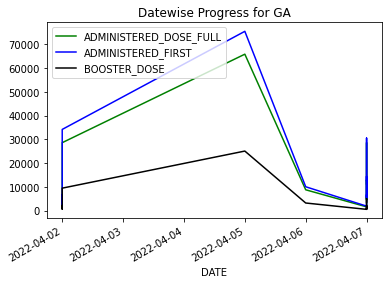

In [17]:
# prefer chossing GA (Becuase these number have bit large data)

print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("- - - - - - - - - - -Daywise Progress report- - - - - - - - - -")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("Please choose one number for the state you want stats for -> ")

c.execute("SELECT * FROM overall_administered_dose;")
data_overall_administered_dose= pd.DataFrame(c.fetchall(),columns=overall_administered_dose_columns)

# converting date column into date format
data_overall_administered_dose['DATE'] = data_overall_administered_dose['DATE'].astype('datetime64[ns]')

# taking a list of states
list_states = list(set(data_overall_administered_dose['STATE']))
for x in range(len(list_states)):
    print(x+1,"->",list_states[x])

st_co = int(input("Enter one number from above numbers >"))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("Your Choice is ->",list_states[st_co-1])

# checking dataframe
newdf_1 = data_overall_administered_dose.loc[(data_overall_administered_dose['STATE'] == list_states[st_co-1])]
del newdf_1['FIPS']
del newdf_1['STATE']

""" plotting data """
#Get current axis
ax = plt.gca() 
# line plot for math marks
newdf_1.plot(kind = 'line', x = 'DATE', y = 'ADMINISTERED_DOSE_FULL', color = 'green',ax = ax)
# line plot for physics marks
newdf_1.plot(kind = 'line', x = 'DATE', y = 'ADMINISTERED_FIRST', color = 'blue',ax = ax)
# line plot for chemistry marks
newdf_1.plot(kind = 'line',x = 'DATE', y = 'BOOSTER_DOSE', color = 'black',ax = ax)
# set the title
plt.title('Datewise Progress for '+str(list_states[st_co-1]))
# show the plot
plt.show()

In [18]:
print(newdf_1)

          DATE  ADMINISTERED_DOSE_FULL  ADMINISTERED_FIRST  BOOSTER_DOSE
5   2022-04-07                    1567                1863           508
6   2022-04-07                    5841                6696          2103
7   2022-04-07                    4543                5181          1577
8   2022-04-07                   28635               30540           540
9   2022-04-07                    4994                5695          1788
10  2022-04-07                   12916               14425          5037
11  2022-04-07                   11242               12684          3616
49  2022-04-06                    8760               10035          3188
75  2022-04-05                   65913               75547         25082
111 2022-04-02                    5837                6687          2085
112 2022-04-02                    1827                2071           615
113 2022-04-02                   28616               34202          9449


# 4.	Write the following database update transactions using JAVA/JDBC or PHP or some other programming/scripting language.

# 4.1	The 1st transaction is to procure x number of doses of one type of vaccine

In [20]:
# give input as 7 & any number
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("- - - - - - - - -Procuring new slots of vaccine-  - - - - - - -")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
val_manu = int(input("Enter the Manufacturer ID ->"))
val_dose_count = int(input("What is the number of doses recived -> "))
print("Checking validity of Manufacturer ID . . . . . . . . . . . .  !")

# fetching all manufacturer IDs
c.execute("SELECT * FROM MANUFACTURER;")
data_MANUFACTURER= pd.DataFrame(c.fetchall(),columns=manufacturer_columns)
if val_manu in list(set(data_MANUFACTURER['MANUFACTURER_ID'])):
    print("Your data is correct we are processing it.")
    c.execute("INSERT INTO DOSE_MANUFACTURER VALUES ("+str(val_manu)+","+str(val_dose_count)+");")
else:
    print("Your manufactrer id is incorrect! Please try again.")
    

# use the following code to check the output
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("- - - - - - - - -After processing the data is - - - - - - - - -")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
c.execute("SELECT * FROM DOSE_MANUFACTURER;")
data_DOSE_MANUFACTURER= pd.DataFrame(c.fetchall(),columns=dose_manufacturer_columns)
print(data_DOSE_MANUFACTURER.iloc[-1])

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - -Procuring new slots of vaccine-  - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Enter the Manufacturer ID ->5
What is the number of doses recived -> 10000000
Checking validity of Manufacturer ID . . . . . . . . . . . .  !
Your data is correct we are processing it.
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - -After processing the data is - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
MANUFACTURER_ID           5
DOSES              10000000
Name: 10, dtype: int64


# 4.2	The 2nd transaction is to distribute certain amount to a state.

In [21]:
# Just for once we have taken the state as primary key so that once alotted state can't be alloted again
# everytime you have to enter new state name
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("- - - - - - - Data for distribution of doses to state - - - - -")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
val_state = input("Enter state name > ")
val_dose_1 = int(input("Enter Total number of doses distributed > "))
val_dose_2 = int(input("Enter Total number of shots of type 1 > "))
val_dose_3 = int(input("Enter Total number of shots of type 2 > "))
val_dose_4 = int(input("Enter Total number of shots of type 3 > "))
print("Checking validity of state in table. . . . . . . . . . . .  !")

# fetching list of all states
c.execute("SELECT * FROM distribution_state;")
data_distribution_state= pd.DataFrame(c.fetchall(),columns=distribution_state_columns)
if val_state not in list(set(data_distribution_state['STATE'])):
    print("We are processing your data!")
    c.execute("INSERT INTO distribution_state VALUES ('"+str(val_state)+"',"+str(val_dose_1)+","+str(val_dose_2)+","+str(val_dose_3)+","+str(val_dose_4)+");")
else:
    print("State name is already there in database.")

# checking data
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("- - - - - - - - -After processing the data is - - - - - - - - -")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
c.execute("SELECT * FROM distribution_state;")
data_distribution_state= pd.DataFrame(c.fetchall(),columns=distribution_state_columns)
print(data_distribution_state.iloc[-1])

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - Data for distribution of doses to state - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Enter state name > Berlin_state_1
Enter Total number of doses distributed > 5000
Enter Total number of shots of type 1 > 1000
Enter Total number of shots of type 2 > 2000
Enter Total number of shots of type 3 > 2000
Checking validity of state in table. . . . . . . . . . . .  !
We are processing your data!
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - -After processing the data is - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
STATE                Berlin_state_1
DOSES_STATE                    5000
DOSES_STATE_TYPE1              1000
DOSES_STATE_TYPE2              2000
DOSES_STATE_TYPE3              2000
Name: 59, dtype: object


# 4.3	The 3rd transaction is to distribute certain amount to to a local body

In [23]:
# data Connecticut & any number 

# State name must be in distribution_state
# everytime you have to enter new state name
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("- - - - - - - Data for distribution of doses to local - - - - -")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
val_state = input("Enter state name > ")
val_dose_1 = int(input("Enter Total number of doses distributed > "))
val_dose_2 = int(input("Enter Total number of shots of type 1 > "))
val_dose_3 = int(input("Enter Total number of shots of type 2 > "))
val_dose_4 = int(input("Enter Total number of shots of type 3 > "))
print("Checking validity of state in table. . . . . . . . . . . .  !")

# fetching list of all states
c.execute("SELECT * FROM distribution_state;")
data_distribution_state= pd.DataFrame(c.fetchall(),columns=distribution_state_columns)
if val_state in list(set(data_distribution_state['STATE'])):
    print("We are processing your data!")
    c.execute("INSERT INTO distribution_local VALUES ('"+str(val_state)+"',"+str(val_dose_1)+","+str(val_dose_2)+","+str(val_dose_3)+","+str(val_dose_4)+");")
else:
    print("State name is not there in database. Get your state registered first.")

# checking data
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("- - - - - - - - -After processing the data is - - - - - - - - -")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
c.execute("SELECT * FROM distribution_local;")
data_distribution_local= pd.DataFrame(c.fetchall(),columns=distribution_local_columns)
print(data_distribution_local.iloc[-1])

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - Data for distribution of doses to local - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Enter state name > Connecticut
Enter Total number of doses distributed > 60000
Enter Total number of shots of type 1 > 20000
Enter Total number of shots of type 2 > 20000
Enter Total number of shots of type 3 > 20000
Checking validity of state in table. . . . . . . . . . . .  !
We are processing your data!
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - - - - - - -After processing the data is - - - - - - - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
STATE                Connecticut
DOSES_LOCAL                60000
DOSES_LOCAL_TYPE1          20000
DOSES_LOCAL_TYPE2          20000
DOSES_LOCAL_TYPE3          20000
Name: 59, dtype: object


# 4.4	 The 4th transaction is to add information about a new dose administered,patient details, 1st or 2nd dose etc. 

In [25]:
# using condirion over two things only
# 1 > SSN number -> Must not be already registered in database
# 2 > FIPS -> this needs to be in overall_administrated_dose table
# if things goes right the data will be inserted else it will roll back

print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("- - - -Form for a new entry in Patient Dose adminitrated- - - -")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
val_FIPS = int(input("Please enter your FIPS number > "))
val_ssn = int(input("Please enter place's SSN number > "))
val_fname = input("Enter patient's first name > ")
val_lname = input("ENter patient's last name > ")
val_add = input("Enter patient's address > ")
val_tele = input("Enter patient's contact number > ")
val_mail = input("Enter patient's e mail id > ")
val_age = input("Enter patient's age > ")
val_med_con = input("Enter patient's medical condition > ")
val_all = input("Enter patient's allergy if have else write \"N/A\"> ")
print("Enter Dose Number as ->")
print("1 -> First Dose")
print("2 -> Second Dose")
print("3 -> Booster Dose")
val_dose = int(input("Write the dose number for patient now > "))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("You have entered all data, \nlet me just check in backend for verification for \nYour FIPS & SSN number")

# initializing status variables
status_FIPS = 0
status_ssn = 0

# checking FIPS number
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("We are checking your FIPS number .............................!")
c.execute("SELECT * FROM overall_administered_dose;")
data_overall_administered_dose= pd.DataFrame(c.fetchall(),columns=overall_administered_dose_columns)
if val_FIPS in list(set(data_overall_administered_dose['FIPS'])):
    status_FIPS = 1
    print("Your FIPS number is correct")
    # Checking SSN number
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    print("We are checking your SSN number ..............................!")
    c.execute("SELECT * FROM people;")
    data_people= pd.DataFrame(c.fetchall(),columns=people_columns)
    if val_ssn not in list(set(data_people['SSN'])):
        status_ssn = 1
        print("Your SSN number is correct")
    else:
        print("Your SSN number is incorrect")
else:
    print("Your FIPS number is not correct")

if status_FIPS ==1  and status_ssn==1:
    c.execute("INSERT INTO people VALUES ("+ str(val_FIPS)+","+str(val_ssn)+",'"+str(val_fname)+"','"+str(val_lname)+"','"+str(val_add)+"','"+str(val_tele)+"','"+str(val_mail)+"',"+str(val_age)+",'"+str(val_med_con)+"','"+str(val_all)+"',"+ str(val_dose)+");")
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    print("Your query is executed successfully")
else:
    print("Your didn't entered correct data! Please try again...!")

print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")


# checking values
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("- - - - - - - - -After processing the data is - - - - - - - - -")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
c.execute("SELECT * FROM people;")
data_people= pd.DataFrame(c.fetchall(),columns=people_columns)
print(data_people.iloc[-1])


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - -Form for a new entry in Patient Dose adminitrated- - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Please enter your FIPS number > 2465
Please enter place's SSN number > 1234561
Enter patient's first name > ABC
ENter patient's last name > XYZ
Enter patient's address > DLL, New Work
Enter patient's contact number > 1234567890
Enter patient's e mail id > ABC@gmail.com
Enter patient's age > 23
Enter patient's medical condition > N/A
Enter patient's allergy if have else write "N/A"> N/A
Enter Dose Number as ->
1 -> First Dose
2 -> Second Dose
3 -> Booster Dose
Write the dose number for patient now > 2
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
You have entered all data, 
let me just check in backend for verification for 
Your FIPS & SSN number
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
We are checking your FIPS number .............................!
Your FIP

# 4.5	The 5th transaction is to report an adverse reaction for a patient after administration

In [26]:
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("The data entered resulted into the folowwing row . . . . . . . !")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
c.execute("SELECT * FROM people;")
data_people= pd.DataFrame(c.fetchall(),columns=people_columns)
print(data_people.iloc[-1])

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
The data entered resulted into the folowwing row . . . . . . . !
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
FIPS                          2465
SSN                        1234561
FIRST_NAME                     ABC
LAST_NAME                      XYZ
ADDRESS              DLL, New Work
TELEPHONE               1234567890
EMAIL                ABC@gmail.com
AGE                             23
MEDICAL_CONDITION              N/A
ALLERGY                        N/A
DOSE                             2
Name: 100, dtype: object


# 5.	Write a trigger – To notify the CDC if one individual is administered who should be in phase 2, assuming the current phase running is 1B.

In [28]:

# give SSN as new number every time
# given FIPS must be in database 

# creating trigger
def trigger_func(age):
    if age < 16 or age > 64:
        print("You must be a part of other vaccination drives, as this drive is for only 16-64.")
        return False
    else:
        return True

# using conditions over three things only
# 1 > SSN number -> Must not be already registered in database
# 2 > FIPS -> this needs to be in overall_administrated_dose table
# 3 > As per your age and your data you must be in correct category

print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("- - - -Form for a new entry in Patient Dose adminitrated- - - -")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("- - -  we are taking 1B as the current running phase- - - - - -")
val_FIPS = int(input("Please enter your FIPS number > "))
val_ssn = int(input("Please enter place's SSN number > "))
val_fname = input("Enter patient's first name > ")
val_lname = input("ENter patient's last name > ")
val_add = input("Enter patient's address > ")
val_tele = input("Enter patient's contact number > ")
val_mail = input("Enter patient's e mail id > ")
val_age = int(input("Enter patient's age > "))
val_med_con = input("Enter patient's medical condition > ")
val_all = input("Enter patient's allergy if have else write \"N/A\"> ")
print("Enter Dose Number as ->")
print("1 -> First Dose")
print("2 -> Second Dose")
print("3 -> Booster Dose")
val_dose = int(input("Write the dose number for patient now > "))
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("You have entered all data, \nlet me just check in backend for verification for \nYour FIPS & SSN number")

# initializing status variables
status_FIPS = 0
status_ssn = 0
status_trigger = 0

# checking FIPS number
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print("We are checking your FIPS number .............................!")
c.execute("SELECT * FROM overall_administered_dose;")
data_overall_administered_dose= pd.DataFrame(c.fetchall(),columns=overall_administered_dose_columns)
if val_FIPS in list(set(data_overall_administered_dose['FIPS'])):
    status_FIPS = 1
    print("Your FIPS number is correct")
    # Checking SSN number
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    print("We are checking your SSN number ..............................!")
    c.execute("SELECT * FROM people;")
    data_people= pd.DataFrame(c.fetchall(),columns=people_columns)
    if val_ssn not in list(set(data_people['SSN'])):
        status_ssn = 1
        print("Your SSN number is correct")
        print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
        print("We will be checking few more details..........................!")
        res = trigger_func(val_age)
        if res:
            status_trigger = 1
            print("Your Data is correct.")
        else:
            print("Your age is not appropriate for this drive (Result from trigger)")
    else:
        print("Your SSN number is incorrect")
else:
    print("Your FIPS number is not correct")
if status_FIPS ==1  and status_ssn==1 and status_trigger==1:
    c.execute("INSERT INTO people VALUES ("+ str(val_FIPS)+","+str(val_ssn)+",'"+str(val_fname)+"','"+str(val_lname)+"','"+str(val_add)+"','"+str(val_tele)+"','"+str(val_mail)+"',"+str(val_age)+",'"+str(val_med_con)+"','"+str(val_all)+"',"+ str(val_dose)+");")
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    print("Your query is executed successfully")
else:
    print("Your didn't entered correct data! Please try again...!")
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - - -Form for a new entry in Patient Dose adminitrated- - - -
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
- - -  we are taking 1B as the current running phase- - - - - -
Please enter your FIPS number > 2468
Please enter place's SSN number > 123321
Enter patient's first name > aa
ENter patient's last name > bb
Enter patient's address > aa, new
Enter patient's contact number > 0192837465
Enter patient's e mail id > a@gmail.com
Enter patient's age > 12
Enter patient's medical condition > n/a
Enter patient's allergy if have else write "N/A"> n/a
Enter Dose Number as ->
1 -> First Dose
2 -> Second Dose
3 -> Booster Dose
Write the dose number for patient now > 2
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
You have entered all data, 
let me just check in backend for verification for 
Your FIPS & SSN number
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
We are checking you

In [29]:
"""
Ending the cursor and the database connection
"""

# commits the current transaction 
conn.commit()

# closing the connection 
conn.close()